### Import Packages

In [ ]:
import matplotlib.pyplot as plt

### Import Data

In [ ]:
import pandas as pd
data=pd.read_excel('C:/Users/Hp/Desktop/Kuliah/Semester 6/ADS/cctx_train.xlsx')
data.head()

,Transaction_ID,Transaction_Flag,Transaction_Date,Transaction_Type,Transaction_Amount,Bank_ID,CC_ID,Card_Type,Card_Holder,Channel_ID,...,Country_ID,City_ID,EDC_Type,EDC_Location,EDC_Owner,Average_Transaction_Amount,Maximum_Transaction_Amount,Minimum_Transaction_Amount,Average_Transaction_Frequency,Fraud_Status
0,TX00002,False,2018-01-01 01:48:50.951,T08,50000.0,1,CCID5563,CC11,2,1,...,CTY06,CTY06-133,EDC0885,LEDC3703,OEDC0377,661855.03,11000000.0,24212.0,2.91,0
1,TX00004,False,2018-01-01 09:08:52.666,T01,1000000.0,1,CCID4598,CC08,2,1,...,CTY06,CTY06-129,EDC0565,LEDC3205,OEDC0377,2171907.10,28555000.0,100000.0,3.12,1
2,TX00005,False,2018-01-01 09:08:52.666,T15,1000000.0,1,CCID2839,CC08,2,1,...,CTY06,CTY06-073,EDC4639,LEDC3081,OEDC0377,1714437.98,8500000.0,50.0,3.58,0
3,TX00006,False,2018-01-01 09:45:55.969,T15,1000000.0,1,CCID2968,CC08,2,1,...,CTY06,CTY06-129,EDC3918,LEDC1993,OEDC0377,10163708.23,100000000.0,63000.0,2.57,0
4,TX00007,False,2018-01-01 23:41:59.228,T10,2500000.0,1,CCID0176,CC12,2,1,...,CTY06,CTY06-133,EDC2863,LEDC2062,OEDC0377,690066.65,3523000.0,26500.0,4.23,0


### Data Understanding

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Transaction_ID                 10500 non-null  object        
 1   Transaction_Flag               10500 non-null  bool          
 2   Transaction_Date               10500 non-null  datetime64[ns]
 3   Transaction_Type               10500 non-null  object        
 4   Transaction_Amount             10500 non-null  float64       
 5   Bank_ID                        10500 non-null  int64         
 6   CC_ID                          10500 non-null  object        
 7   Card_Type                      10500 non-null  object        
 8   Card_Holder                    10500 non-null  int64         
 9   Channel_ID                     10500 non-null  int64         
 10  Merchant_ID                    10500 non-null  object        
 11  Country_ID     

In [ ]:
data.groupby(['Fraud_Status'])[['Transaction_Amount']].sum()

,Transaction_Amount
Fraud_Status,
0,1.230508e+10
1,1.559213e+09


Dengan asumsi setiap kerugian fraud berasal dari transaction amountnya, maka total kerugian yang dimiliki perusahaan adalah **Rp 1.559.213.000**

In [ ]:
def null_counts(data, style=True):
    nulls = data.isna().sum().rename_axis('Columns').reset_index(name='Count')
    nulls['Percentage'] = nulls['Count'] / len(data)
    nulls = nulls.loc[nulls['Count'] > 0]
    nulls.sort_values(by='Count', ascending=False, inplace=True)
    nulls.reset_index(drop=True, inplace=True)
    
    if style:
        nulls = nulls.style.format({'Count': '{:,}', 'Percentage': '{:.2%}'}).hide_index()
        
    return nulls

In [ ]:
null_counts(data)

Columns,Count,Percentage
Average_Transaction_Amount,16,0.15%
Maximum_Transaction_Amount,16,0.15%
Minimum_Transaction_Amount,16,0.15%
Average_Transaction_Frequency,16,0.15%


In [ ]:
data.loc[(data['Average_Transaction_Amount'].isna()==True)&(data['Fraud_Status']==0)]

,Transaction_ID,Transaction_Flag,Transaction_Date,Transaction_Type,Transaction_Amount,Bank_ID,CC_ID,Card_Type,Card_Holder,Channel_ID,...,Country_ID,City_ID,EDC_Type,EDC_Location,EDC_Owner,Average_Transaction_Amount,Maximum_Transaction_Amount,Minimum_Transaction_Amount,Average_Transaction_Frequency,Fraud_Status
553,TX00674,False,2018-04-08 17:22:56.698,T15,100000.0,1,CCID4050,CC09,2,1,...,CTY06,CTY06-023,EDC1728,LEDC1030,OEDC0377,NaN,NaN,NaN,NaN,0
4721,TX05908,False,2018-07-21 09:41:52.023,T04,25000.0,1,CCID7542,CC11,2,1,...,CTY06,CTY06-133,EDC3480,LEDC2590,OEDC0377,NaN,NaN,NaN,NaN,0


In [ ]:
data.drop(index=[553,4721],inplace=True)

In [ ]:
def median(var,status):
    med=data.loc[data['Fraud_Status']==status,var].median()#ngambil median weight dari jenis kelamin male
    med
    return(med)

In [ ]:
data['Average_Transaction_Amount'].fillna(median('Average_Transaction_Amount',1),inplace=True)
data['Average_Transaction_Frequency'].fillna(median('Average_Transaction_Frequency',1),inplace=True)
data['Minimum_Transaction_Amount'].fillna(median('Minimum_Transaction_Amount',1),inplace=True)
data['Maximum_Transaction_Amount'].fillna(median('Maximum_Transaction_Amount',1),inplace=True)


In [ ]:
data['Total_Month']=data['Average_Transaction_Amount']*data['Average_Transaction_Frequency']
data.head()

,Transaction_ID,Transaction_Flag,Transaction_Date,Transaction_Type,Transaction_Amount,Bank_ID,CC_ID,Card_Type,Card_Holder,Channel_ID,...,City_ID,EDC_Type,EDC_Location,EDC_Owner,Average_Transaction_Amount,Maximum_Transaction_Amount,Minimum_Transaction_Amount,Average_Transaction_Frequency,Fraud_Status,Total_Month
0,TX00002,False,2018-01-01 01:48:50.951,T08,50000.0,1,CCID5563,CC11,2,1,...,CTY06-133,EDC0885,LEDC3703,OEDC0377,661855.03,11000000.0,24212.0,2.91,0,1.925998e+06
1,TX00004,False,2018-01-01 09:08:52.666,T01,1000000.0,1,CCID4598,CC08,2,1,...,CTY06-129,EDC0565,LEDC3205,OEDC0377,2171907.10,28555000.0,100000.0,3.12,1,6.776350e+06
2,TX00005,False,2018-01-01 09:08:52.666,T15,1000000.0,1,CCID2839,CC08,2,1,...,CTY06-073,EDC4639,LEDC3081,OEDC0377,1714437.98,8500000.0,50.0,3.58,0,6.137688e+06
3,TX00006,False,2018-01-01 09:45:55.969,T15,1000000.0,1,CCID2968,CC08,2,1,...,CTY06-129,EDC3918,LEDC1993,OEDC0377,10163708.23,100000000.0,63000.0,2.57,0,2.612073e+07
4,TX00007,False,2018-01-01 23:41:59.228,T10,2500000.0,1,CCID0176,CC12,2,1,...,CTY06-133,EDC2863,LEDC2062,OEDC0377,690066.65,3523000.0,26500.0,4.23,0,2.918982e+06


In [ ]:
data.loc[(data['Minimum_Transaction_Amount']<7000)&(data['Fraud_Status']==1)
         ,'Minimum_Transaction_Amount']=median('Minimum_Transaction_Amount',1)

In [ ]:
index2=data.loc[data['Minimum_Transaction_Amount']<7000].index

In [ ]:
data.drop(index=index2,inplace=True)

In [ ]:
data.loc[data['Transaction_Amount']==1]

,Transaction_ID,Transaction_Flag,Transaction_Date,Transaction_Type,Transaction_Amount,Bank_ID,CC_ID,Card_Type,Card_Holder,Channel_ID,...,City_ID,EDC_Type,EDC_Location,EDC_Owner,Average_Transaction_Amount,Maximum_Transaction_Amount,Minimum_Transaction_Amount,Average_Transaction_Frequency,Fraud_Status,Total_Month
9459,TX11819,False,2018-11-06 08:02:01.458,T06,1.0,1,CCID5754,CC10,1,5,...,CTY06-186,EDC0002,LEDC1012,OEDC0206,433296.7,2700000.0,7000.0,2.27,0,983583.509


In [ ]:
data.drop(index=9459,inplace=True)

### Data Preparation

Dari data yang diperoleh, terdapat beberapa variabel memiliki 1 nilai saja

In [ ]:
def value_counts(data, col, style=True):
    table = data[col].value_counts().rename_axis('Value').reset_index(name='Count')
    table['Percentage'] = table['Count'] / table['Count'].sum(axis=0)
    
    if style:
        table = table.style.format({'Count': '{:,}', 'Percentage': '{:.2%}'}).hide_index()
        
    return table

In [ ]:
value_counts(data,'Bank_ID')

Value,Count,Percentage
1,"10,427",100.00%


Karena variable Bank_ID tidak bervariasi maka dihilangkan

In [ ]:
data=data.drop(['Bank_ID'],axis=1)
data.head()

,Transaction_ID,Transaction_Flag,Transaction_Date,Transaction_Type,Transaction_Amount,CC_ID,Card_Type,Card_Holder,Channel_ID,Merchant_ID,...,City_ID,EDC_Type,EDC_Location,EDC_Owner,Average_Transaction_Amount,Maximum_Transaction_Amount,Minimum_Transaction_Amount,Average_Transaction_Frequency,Fraud_Status,Total_Month
0,TX00002,False,2018-01-01 01:48:50.951,T08,50000.0,CCID5563,CC11,2,1,M0001,...,CTY06-133,EDC0885,LEDC3703,OEDC0377,661855.03,11000000.0,24212.0,2.91,0,1.925998e+06
1,TX00004,False,2018-01-01 09:08:52.666,T01,1000000.0,CCID4598,CC08,2,1,M0001,...,CTY06-129,EDC0565,LEDC3205,OEDC0377,2171907.10,28555000.0,100000.0,3.12,1,6.776350e+06
3,TX00006,False,2018-01-01 09:45:55.969,T15,1000000.0,CCID2968,CC08,2,1,M0001,...,CTY06-129,EDC3918,LEDC1993,OEDC0377,10163708.23,100000000.0,63000.0,2.57,0,2.612073e+07
4,TX00007,False,2018-01-01 23:41:59.228,T10,2500000.0,CCID0176,CC12,2,1,M0001,...,CTY06-133,EDC2863,LEDC2062,OEDC0377,690066.65,3523000.0,26500.0,4.23,0,2.918982e+06
5,TX00008,False,2018-01-02 01:07:40.615,T03,1137548.0,CCID0475,CC08,2,1,M0001,...,CTY06-023,EDC1726,LEDC1081,OEDC0377,1562360.69,17000000.0,100000.0,3.63,0,5.671369e+06


In [ ]:
value_counts(data,'Transaction_Flag')

Value,Count,Percentage
False,"10,427",100.00%


Karena variable Transaction_Flag tidak bervariasi maka dihilangkan

In [ ]:
data=data.drop(['Transaction_Flag'],axis=1)
data.head()

,Transaction_ID,Transaction_Date,Transaction_Type,Transaction_Amount,CC_ID,Card_Type,Card_Holder,Channel_ID,Merchant_ID,Country_ID,City_ID,EDC_Type,EDC_Location,EDC_Owner,Average_Transaction_Amount,Maximum_Transaction_Amount,Minimum_Transaction_Amount,Average_Transaction_Frequency,Fraud_Status,Total_Month
0,TX00002,2018-01-01 01:48:50.951,T08,50000.0,CCID5563,CC11,2,1,M0001,CTY06,CTY06-133,EDC0885,LEDC3703,OEDC0377,661855.03,11000000.0,24212.0,2.91,0,1.925998e+06
1,TX00004,2018-01-01 09:08:52.666,T01,1000000.0,CCID4598,CC08,2,1,M0001,CTY06,CTY06-129,EDC0565,LEDC3205,OEDC0377,2171907.10,28555000.0,100000.0,3.12,1,6.776350e+06
3,TX00006,2018-01-01 09:45:55.969,T15,1000000.0,CCID2968,CC08,2,1,M0001,CTY06,CTY06-129,EDC3918,LEDC1993,OEDC0377,10163708.23,100000000.0,63000.0,2.57,0,2.612073e+07
4,TX00007,2018-01-01 23:41:59.228,T10,2500000.0,CCID0176,CC12,2,1,M0001,CTY06,CTY06-133,EDC2863,LEDC2062,OEDC0377,690066.65,3523000.0,26500.0,4.23,0,2.918982e+06
5,TX00008,2018-01-02 01:07:40.615,T03,1137548.0,CCID0475,CC08,2,1,M0001,CTY06,CTY06-023,EDC1726,LEDC1081,OEDC0377,1562360.69,17000000.0,100000.0,3.63,0,5.671369e+06


In [ ]:
value_counts(data,'Transaction_Type')

Value,Count,Percentage
T01,"2,852",27.35%
T15,"2,430",23.30%
T02,"1,317",12.63%
T08,"1,070",10.26%
T13,766,7.35%
T06,674,6.46%
T14,503,4.82%
T04,258,2.47%
T03,205,1.97%
T10,112,1.07%


In [ ]:
CTT=[] 
for i,j in enumerate (data['Transaction_Type']):
    if j=='T01':
        CTT.append(1)
    elif j=='T15':
        CTT.append(1) 
    else:
        CTT.append(0)
data['Common_Transaction_Type']=CTT
data.head()

,Transaction_ID,Transaction_Date,Transaction_Type,Transaction_Amount,CC_ID,Card_Type,Card_Holder,Channel_ID,Merchant_ID,Country_ID,...,EDC_Type,EDC_Location,EDC_Owner,Average_Transaction_Amount,Maximum_Transaction_Amount,Minimum_Transaction_Amount,Average_Transaction_Frequency,Fraud_Status,Total_Month,Common_Transaction_Type
0,TX00002,2018-01-01 01:48:50.951,T08,50000.0,CCID5563,CC11,2,1,M0001,CTY06,...,EDC0885,LEDC3703,OEDC0377,661855.03,11000000.0,24212.0,2.91,0,1.925998e+06,0
1,TX00004,2018-01-01 09:08:52.666,T01,1000000.0,CCID4598,CC08,2,1,M0001,CTY06,...,EDC0565,LEDC3205,OEDC0377,2171907.10,28555000.0,100000.0,3.12,1,6.776350e+06,1
3,TX00006,2018-01-01 09:45:55.969,T15,1000000.0,CCID2968,CC08,2,1,M0001,CTY06,...,EDC3918,LEDC1993,OEDC0377,10163708.23,100000000.0,63000.0,2.57,0,2.612073e+07,1
4,TX00007,2018-01-01 23:41:59.228,T10,2500000.0,CCID0176,CC12,2,1,M0001,CTY06,...,EDC2863,LEDC2062,OEDC0377,690066.65,3523000.0,26500.0,4.23,0,2.918982e+06,0
5,TX00008,2018-01-02 01:07:40.615,T03,1137548.0,CCID0475,CC08,2,1,M0001,CTY06,...,EDC1726,LEDC1081,OEDC0377,1562360.69,17000000.0,100000.0,3.63,0,5.671369e+06,0


In [ ]:
value_counts(data,'Card_Type')

Value,Count,Percentage
CC11,"3,804",36.48%
CC08,"2,101",20.15%
CC09,"1,377",13.21%
CC00,"1,254",12.03%
CC10,"1,084",10.40%
CC04,236,2.26%
CC01,155,1.49%
CC02,154,1.48%
CC05,145,1.39%
CC12,54,0.52%


In [ ]:
DCT=[] 
for i,j in enumerate (data['Card_Type']):
    if j=='CC11':
        DCT.append(1)
    elif j=='CC08':
        DCT.append(1) 
    else:
        DCT.append(0)
data['Common_Card_Type']=DCT
data.head()

,Transaction_ID,Transaction_Date,Transaction_Type,Transaction_Amount,CC_ID,Card_Type,Card_Holder,Channel_ID,Merchant_ID,Country_ID,...,EDC_Location,EDC_Owner,Average_Transaction_Amount,Maximum_Transaction_Amount,Minimum_Transaction_Amount,Average_Transaction_Frequency,Fraud_Status,Total_Month,Common_Transaction_Type,Common_Card_Type
0,TX00002,2018-01-01 01:48:50.951,T08,50000.0,CCID5563,CC11,2,1,M0001,CTY06,...,LEDC3703,OEDC0377,661855.03,11000000.0,24212.0,2.91,0,1.925998e+06,0,1
1,TX00004,2018-01-01 09:08:52.666,T01,1000000.0,CCID4598,CC08,2,1,M0001,CTY06,...,LEDC3205,OEDC0377,2171907.10,28555000.0,100000.0,3.12,1,6.776350e+06,1,1
3,TX00006,2018-01-01 09:45:55.969,T15,1000000.0,CCID2968,CC08,2,1,M0001,CTY06,...,LEDC1993,OEDC0377,10163708.23,100000000.0,63000.0,2.57,0,2.612073e+07,1,1
4,TX00007,2018-01-01 23:41:59.228,T10,2500000.0,CCID0176,CC12,2,1,M0001,CTY06,...,LEDC2062,OEDC0377,690066.65,3523000.0,26500.0,4.23,0,2.918982e+06,0,0
5,TX00008,2018-01-02 01:07:40.615,T03,1137548.0,CCID0475,CC08,2,1,M0001,CTY06,...,LEDC1081,OEDC0377,1562360.69,17000000.0,100000.0,3.63,0,5.671369e+06,0,1


In [ ]:
value_counts(data,'Card_Holder')

Value,Count,Percentage
2,"9,718",93.20%
1,709,6.80%


Karena persentase card holder tipe 1 adalah 6% dimana masih diatas 5% maka variabel ini tidak dibuang

In [ ]:
value_counts(data,'Channel_ID')

Value,Count,Percentage
1,"8,265",79.27%
2,"1,453",13.93%
5,679,6.51%
3,25,0.24%
4,5,0.05%


In [ ]:
DCI=[] 
for i,j in enumerate (data['Channel_ID']):
    if j==1:
        DCI.append(1)
    else:
        DCI.append(0)
data['ChannelID_1']=DCI
data.head()

,Transaction_ID,Transaction_Date,Transaction_Type,Transaction_Amount,CC_ID,Card_Type,Card_Holder,Channel_ID,Merchant_ID,Country_ID,...,EDC_Owner,Average_Transaction_Amount,Maximum_Transaction_Amount,Minimum_Transaction_Amount,Average_Transaction_Frequency,Fraud_Status,Total_Month,Common_Transaction_Type,Common_Card_Type,ChannelID_1
0,TX00002,2018-01-01 01:48:50.951,T08,50000.0,CCID5563,CC11,2,1,M0001,CTY06,...,OEDC0377,661855.03,11000000.0,24212.0,2.91,0,1.925998e+06,0,1,1
1,TX00004,2018-01-01 09:08:52.666,T01,1000000.0,CCID4598,CC08,2,1,M0001,CTY06,...,OEDC0377,2171907.10,28555000.0,100000.0,3.12,1,6.776350e+06,1,1,1
3,TX00006,2018-01-01 09:45:55.969,T15,1000000.0,CCID2968,CC08,2,1,M0001,CTY06,...,OEDC0377,10163708.23,100000000.0,63000.0,2.57,0,2.612073e+07,1,1,1
4,TX00007,2018-01-01 23:41:59.228,T10,2500000.0,CCID0176,CC12,2,1,M0001,CTY06,...,OEDC0377,690066.65,3523000.0,26500.0,4.23,0,2.918982e+06,0,0,1
5,TX00008,2018-01-02 01:07:40.615,T03,1137548.0,CCID0475,CC08,2,1,M0001,CTY06,...,OEDC0377,1562360.69,17000000.0,100000.0,3.63,0,5.671369e+06,0,1,1


In [ ]:
value_counts(data,'Country_ID')

Value,Count,Percentage
CTY06,"10,391",99.65%
CTY08,9,0.09%
CTY05,8,0.08%
CTY07,5,0.05%
CTY01,3,0.03%
CTY13,3,0.03%
CTY12,2,0.02%
CTY09,2,0.02%
CTY10,2,0.02%
CTY04,1,0.01%


In [ ]:
data=data.drop('Country_ID',axis=1)
data.head()

,Transaction_ID,Transaction_Date,Transaction_Type,Transaction_Amount,CC_ID,Card_Type,Card_Holder,Channel_ID,Merchant_ID,City_ID,...,EDC_Owner,Average_Transaction_Amount,Maximum_Transaction_Amount,Minimum_Transaction_Amount,Average_Transaction_Frequency,Fraud_Status,Total_Month,Common_Transaction_Type,Common_Card_Type,ChannelID_1
0,TX00002,2018-01-01 01:48:50.951,T08,50000.0,CCID5563,CC11,2,1,M0001,CTY06-133,...,OEDC0377,661855.03,11000000.0,24212.0,2.91,0,1.925998e+06,0,1,1
1,TX00004,2018-01-01 09:08:52.666,T01,1000000.0,CCID4598,CC08,2,1,M0001,CTY06-129,...,OEDC0377,2171907.10,28555000.0,100000.0,3.12,1,6.776350e+06,1,1,1
3,TX00006,2018-01-01 09:45:55.969,T15,1000000.0,CCID2968,CC08,2,1,M0001,CTY06-129,...,OEDC0377,10163708.23,100000000.0,63000.0,2.57,0,2.612073e+07,1,1,1
4,TX00007,2018-01-01 23:41:59.228,T10,2500000.0,CCID0176,CC12,2,1,M0001,CTY06-133,...,OEDC0377,690066.65,3523000.0,26500.0,4.23,0,2.918982e+06,0,0,1
5,TX00008,2018-01-02 01:07:40.615,T03,1137548.0,CCID0475,CC08,2,1,M0001,CTY06-023,...,OEDC0377,1562360.69,17000000.0,100000.0,3.63,0,5.671369e+06,0,1,1


In [ ]:
value_counts(data,'City_ID')

Value,Count,Percentage
CTY06-023,"4,225",40.52%
CTY06-133,"1,262",12.10%
CTY06-181,800,7.67%
CTY06-171,439,4.21%
CTY06-186,334,3.20%
CTY06-129,259,2.48%
CTY06-005,172,1.65%
CTY06-112,153,1.47%
CTY06-004,144,1.38%
CTY06-151,112,1.07%


In [ ]:
CCI=[] 
for i,j in enumerate (data['City_ID']):
    if j=='CTY06-023':
        CCI.append(1)
    elif j=='CTY06-133':
        CCI.append(1)
    else:
        CCI.append(0)
data['Common_City']=CCI
data.head()

,Transaction_ID,Transaction_Date,Transaction_Type,Transaction_Amount,CC_ID,Card_Type,Card_Holder,Channel_ID,Merchant_ID,City_ID,...,Average_Transaction_Amount,Maximum_Transaction_Amount,Minimum_Transaction_Amount,Average_Transaction_Frequency,Fraud_Status,Total_Month,Common_Transaction_Type,Common_Card_Type,ChannelID_1,Common_City
0,TX00002,2018-01-01 01:48:50.951,T08,50000.0,CCID5563,CC11,2,1,M0001,CTY06-133,...,661855.03,11000000.0,24212.0,2.91,0,1.925998e+06,0,1,1,1
1,TX00004,2018-01-01 09:08:52.666,T01,1000000.0,CCID4598,CC08,2,1,M0001,CTY06-129,...,2171907.10,28555000.0,100000.0,3.12,1,6.776350e+06,1,1,1,0
3,TX00006,2018-01-01 09:45:55.969,T15,1000000.0,CCID2968,CC08,2,1,M0001,CTY06-129,...,10163708.23,100000000.0,63000.0,2.57,0,2.612073e+07,1,1,1,0
4,TX00007,2018-01-01 23:41:59.228,T10,2500000.0,CCID0176,CC12,2,1,M0001,CTY06-133,...,690066.65,3523000.0,26500.0,4.23,0,2.918982e+06,0,0,1,1
5,TX00008,2018-01-02 01:07:40.615,T03,1137548.0,CCID0475,CC08,2,1,M0001,CTY06-023,...,1562360.69,17000000.0,100000.0,3.63,0,5.671369e+06,0,1,1,1


In [ ]:
value_counts(data,'EDC_Owner')

Value,Count,Percentage
OEDC0377,"8,265",79.27%
OEDC0378,15,0.14%
OEDC0886,6,0.06%
OEDC1363,6,0.06%
OEDC0212,6,0.06%
OEDC1048,5,0.05%
OEDC0909,5,0.05%
OEDC1438,5,0.05%
OEDC1035,5,0.05%
OEDC0380,5,0.05%


In [ ]:
EDC=[] 
for i,j in enumerate (data['EDC_Owner']):
    if j=='OEDC0377':
        EDC.append(1)
    else:
        EDC.append(0)
data['Common_EDC_Owner']=EDC
data.head()

,Transaction_ID,Transaction_Date,Transaction_Type,Transaction_Amount,CC_ID,Card_Type,Card_Holder,Channel_ID,Merchant_ID,City_ID,...,Maximum_Transaction_Amount,Minimum_Transaction_Amount,Average_Transaction_Frequency,Fraud_Status,Total_Month,Common_Transaction_Type,Common_Card_Type,ChannelID_1,Common_City,Common_EDC_Owner
0,TX00002,2018-01-01 01:48:50.951,T08,50000.0,CCID5563,CC11,2,1,M0001,CTY06-133,...,11000000.0,24212.0,2.91,0,1.925998e+06,0,1,1,1,1
1,TX00004,2018-01-01 09:08:52.666,T01,1000000.0,CCID4598,CC08,2,1,M0001,CTY06-129,...,28555000.0,100000.0,3.12,1,6.776350e+06,1,1,1,0,1
3,TX00006,2018-01-01 09:45:55.969,T15,1000000.0,CCID2968,CC08,2,1,M0001,CTY06-129,...,100000000.0,63000.0,2.57,0,2.612073e+07,1,1,1,0,1
4,TX00007,2018-01-01 23:41:59.228,T10,2500000.0,CCID0176,CC12,2,1,M0001,CTY06-133,...,3523000.0,26500.0,4.23,0,2.918982e+06,0,0,1,1,1
5,TX00008,2018-01-02 01:07:40.615,T03,1137548.0,CCID0475,CC08,2,1,M0001,CTY06-023,...,17000000.0,100000.0,3.63,0,5.671369e+06,0,1,1,1,1


In [ ]:
value_counts(data,'Merchant_ID')

Value,Count,Percentage
M0001,"8,974",86.07%
M0100,6,0.06%
M0063,6,0.06%
M0140,6,0.06%
M0243,6,0.06%
M0088,5,0.05%
M0405,5,0.05%
M0343,5,0.05%
M0187,5,0.05%
M0644,4,0.04%


In [ ]:
MCI=[] 
for i,j in enumerate (data['Merchant_ID']):
    if j=='OEDC0377':
        MCI.append(1)
    else:
        MCI.append(0)
data['Common_Merchant_ID']=MCI
data.head()

,Transaction_ID,Transaction_Date,Transaction_Type,Transaction_Amount,CC_ID,Card_Type,Card_Holder,Channel_ID,Merchant_ID,City_ID,...,Minimum_Transaction_Amount,Average_Transaction_Frequency,Fraud_Status,Total_Month,Common_Transaction_Type,Common_Card_Type,ChannelID_1,Common_City,Common_EDC_Owner,Common_Merchant_ID
0,TX00002,2018-01-01 01:48:50.951,T08,50000.0,CCID5563,CC11,2,1,M0001,CTY06-133,...,24212.0,2.91,0,1.925998e+06,0,1,1,1,1,0
1,TX00004,2018-01-01 09:08:52.666,T01,1000000.0,CCID4598,CC08,2,1,M0001,CTY06-129,...,100000.0,3.12,1,6.776350e+06,1,1,1,0,1,0
3,TX00006,2018-01-01 09:45:55.969,T15,1000000.0,CCID2968,CC08,2,1,M0001,CTY06-129,...,63000.0,2.57,0,2.612073e+07,1,1,1,0,1,0
4,TX00007,2018-01-01 23:41:59.228,T10,2500000.0,CCID0176,CC12,2,1,M0001,CTY06-133,...,26500.0,4.23,0,2.918982e+06,0,0,1,1,1,0
5,TX00008,2018-01-02 01:07:40.615,T03,1137548.0,CCID0475,CC08,2,1,M0001,CTY06-023,...,100000.0,3.63,0,5.671369e+06,0,1,1,1,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10427 entries, 0 to 10499
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Transaction_ID                 10427 non-null  object        
 1   Transaction_Date               10427 non-null  datetime64[ns]
 2   Transaction_Type               10427 non-null  object        
 3   Transaction_Amount             10427 non-null  float64       
 4   CC_ID                          10427 non-null  object        
 5   Card_Type                      10427 non-null  object        
 6   Card_Holder                    10427 non-null  int64         
 7   Channel_ID                     10427 non-null  int64         
 8   Merchant_ID                    10427 non-null  object        
 9   City_ID                        10427 non-null  object        
 10  EDC_Type                       10427 non-null  object        
 11  EDC_Location   

In [ ]:
def remove_outlier(data,var):
    from scipy.stats import iqr
    import numpy as np
    IQR=iqr(data[var], axis=0)
    Q1 = np.quantile(data[var],0.25)
    Q3 = np.quantile(data[var],0.75)
    down=Q1 - 1.5*IQR
    up=Q3 + 1.5*IQR
    data.loc[(data[var]>up)&(data['Fraud_Status']==1)
         ,var]=median(var,1)
    data.loc[(data[var]<down)&(data['Fraud_Status']==1)
         ,var]=median(var,1)
    index1=data.loc[(data[var]>up)&(data['Fraud_Status']==0)]
    index2=data.loc[(data[var]<down)&(data['Fraud_Status']==0)]
    data.drop(index=index1.index,inplace=True)
    data.drop(index=index2.index,inplace=True)
    return(data)                                     

In [ ]:
data=remove_outlier(data,'Average_Transaction_Amount')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9881 entries, 0 to 10499
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Transaction_ID                 9881 non-null   object        
 1   Transaction_Date               9881 non-null   datetime64[ns]
 2   Transaction_Type               9881 non-null   object        
 3   Transaction_Amount             9881 non-null   float64       
 4   CC_ID                          9881 non-null   object        
 5   Card_Type                      9881 non-null   object        
 6   Card_Holder                    9881 non-null   int64         
 7   Channel_ID                     9881 non-null   int64         
 8   Merchant_ID                    9881 non-null   object        
 9   City_ID                        9881 non-null   object        
 10  EDC_Type                       9881 non-null   object        
 11  EDC_Location    

In [ ]:
data=remove_outlier(data,'Transaction_Amount')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9385 entries, 0 to 10499
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Transaction_ID                 9385 non-null   object        
 1   Transaction_Date               9385 non-null   datetime64[ns]
 2   Transaction_Type               9385 non-null   object        
 3   Transaction_Amount             9385 non-null   float64       
 4   CC_ID                          9385 non-null   object        
 5   Card_Type                      9385 non-null   object        
 6   Card_Holder                    9385 non-null   int64         
 7   Channel_ID                     9385 non-null   int64         
 8   Merchant_ID                    9385 non-null   object        
 9   City_ID                        9385 non-null   object        
 10  EDC_Type                       9385 non-null   object        
 11  EDC_Location    

In [ ]:
data=remove_outlier(data,'Minimum_Transaction_Amount')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8687 entries, 0 to 10499
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Transaction_ID                 8687 non-null   object        
 1   Transaction_Date               8687 non-null   datetime64[ns]
 2   Transaction_Type               8687 non-null   object        
 3   Transaction_Amount             8687 non-null   float64       
 4   CC_ID                          8687 non-null   object        
 5   Card_Type                      8687 non-null   object        
 6   Card_Holder                    8687 non-null   int64         
 7   Channel_ID                     8687 non-null   int64         
 8   Merchant_ID                    8687 non-null   object        
 9   City_ID                        8687 non-null   object        
 10  EDC_Type                       8687 non-null   object        
 11  EDC_Location    

In [ ]:
data=remove_outlier(data,'Average_Transaction_Frequency')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8215 entries, 0 to 10499
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Transaction_ID                 8215 non-null   object        
 1   Transaction_Date               8215 non-null   datetime64[ns]
 2   Transaction_Type               8215 non-null   object        
 3   Transaction_Amount             8215 non-null   float64       
 4   CC_ID                          8215 non-null   object        
 5   Card_Type                      8215 non-null   object        
 6   Card_Holder                    8215 non-null   int64         
 7   Channel_ID                     8215 non-null   int64         
 8   Merchant_ID                    8215 non-null   object        
 9   City_ID                        8215 non-null   object        
 10  EDC_Type                       8215 non-null   object        
 11  EDC_Location    

In [ ]:
data=remove_outlier(data,'Maximum_Transaction_Amount')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7498 entries, 0 to 10499
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Transaction_ID                 7498 non-null   object        
 1   Transaction_Date               7498 non-null   datetime64[ns]
 2   Transaction_Type               7498 non-null   object        
 3   Transaction_Amount             7498 non-null   float64       
 4   CC_ID                          7498 non-null   object        
 5   Card_Type                      7498 non-null   object        
 6   Card_Holder                    7498 non-null   int64         
 7   Channel_ID                     7498 non-null   int64         
 8   Merchant_ID                    7498 non-null   object        
 9   City_ID                        7498 non-null   object        
 10  EDC_Type                       7498 non-null   object        
 11  EDC_Location    

In [ ]:
response='Fraud_Status'
glm_vars = ['Transaction_Amount','Card_Holder','Maximum_Transaction_Amount',
            'Minimum_Transaction_Amount','Total_Month','Average_Transaction_Amount',
            'Average_Transaction_Frequency']

In [ ]:
data[glm_vars].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7498 entries, 0 to 10499
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Transaction_Amount             7498 non-null   float64
 1   Card_Holder                    7498 non-null   int64  
 2   Maximum_Transaction_Amount     7498 non-null   float64
 3   Minimum_Transaction_Amount     7498 non-null   float64
 4   Total_Month                    7498 non-null   float64
 5   Average_Transaction_Amount     7498 non-null   float64
 6   Average_Transaction_Frequency  7498 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 788.6 KB


In [ ]:
data1=data[glm_vars]
data1.head()

,Transaction_Amount,Card_Holder,Maximum_Transaction_Amount,Minimum_Transaction_Amount,Total_Month,Average_Transaction_Amount,Average_Transaction_Frequency
0,50000.0,2,11000000.0,24212.0,1.925998e+06,661855.03,2.91
1,1000000.0,2,5000000.0,100000.0,6.776350e+06,2171907.10,3.12
4,2500000.0,2,3523000.0,26500.0,2.918982e+06,690066.65,4.23
5,1137548.0,2,17000000.0,100000.0,5.671369e+06,1562360.69,3.63
6,1950000.0,2,5000000.0,50000.0,1.502841e+06,774660.17,1.94


In [ ]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(data, features, style=True):
    # Add constant to the GLM variables
    X = add_constant(data[features])
    vif_values = [variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])]
    vif_df = pd.DataFrame({'Variable': features, 'VIF': vif_values})
    vif_df = vif_df.sort_values('VIF', ascending=False).reset_index(drop=True)
    vif_df.index += 1

    if style:
        vif_df = vif_df.style.format({'VIF': '{:,.2f}'})
        
    return vif_df

In [ ]:
vif(data, glm_vars)

,Variable,VIF
1,Average_Transaction_Amount,2.81
2,Maximum_Transaction_Amount,1.87
3,Total_Month,1.82
4,Average_Transaction_Frequency,1.43
5,Transaction_Amount,1.29
6,Minimum_Transaction_Amount,1.23
7,Card_Holder,1.02


In [ ]:
import numpy as np
import seaborn as sns
def correlation_plot(df, features, plotsize=(11,11), corr_type='pearson', number_format='.1%', fontsize=11):
    corrs = data[features].corr(method=corr_type)
    triangle = np.triu(corrs)

    fig, ax = plt.subplots(figsize=plotsize)
    ax = sns.heatmap(corrs, mask=triangle, annot=True, annot_kws={'size': fontsize}, fmt=number_format, cmap='RdYlGn_r', 
                     cbar_kws={'shrink': 0.8}, vmin=-1, center=0, vmax=1, square=True, linewidths=0.1, linecolor='white')
    plt.show()

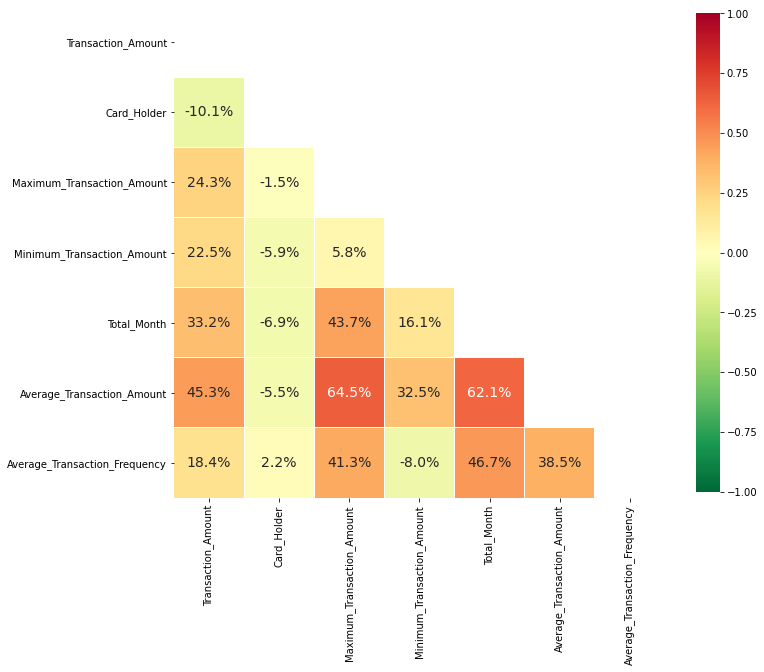

In [ ]:
correlation_plot(data, glm_vars, fontsize=14)

EDC_Owner	Average_Transaction_Amount	Maximum_Transaction_Amount	Minimum_Transaction_Amount	Average_Transaction_Frequency	Fraud_Status

In [ ]:
glm_vars2=['Transaction_Amount','Card_Holder','Maximum_Transaction_Amount',
            'Minimum_Transaction_Amount','Total_Month','Average_Transaction_Amount',
            'Average_Transaction_Frequency','Fraud_Status']

In [ ]:
data2=data[glm_vars2]
data2.head()

,Transaction_Amount,Card_Holder,Maximum_Transaction_Amount,Minimum_Transaction_Amount,Total_Month,Average_Transaction_Amount,Average_Transaction_Frequency,Fraud_Status
0,50000.0,2,11000000.0,24212.0,1.925998e+06,661855.03,2.91,0
1,1000000.0,2,5000000.0,100000.0,6.776350e+06,2171907.10,3.12,1
4,2500000.0,2,3523000.0,26500.0,2.918982e+06,690066.65,4.23,0
5,1137548.0,2,17000000.0,100000.0,5.671369e+06,1562360.69,3.63,0
6,1950000.0,2,5000000.0,50000.0,1.502841e+06,774660.17,1.94,0


In [ ]:
import ppscore as pps

In [ ]:
pps_mtx = pps.matrix(data2.astype({'Fraud_Status':'category'}))

In [ ]:
pps_predictors2target = pps_mtx[(pps_mtx['x'] != 'Fraud_Status') & (pps_mtx['y'] == 'Fraud_Status')].copy()
pps_predictors2target.sort_values(by='ppscore', ascending=False, inplace=True)
pps_predictors2target.reset_index(drop=True, inplace=True)
pps_predictors2target

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Card_Holder,Fraud_Status,0.131677,classification,True,weighted F1,0.857262,0.876057,DecisionTreeClassifier()
1,Average_Transaction_Amount,Fraud_Status,0.064622,classification,True,weighted F1,0.857262,0.866486,DecisionTreeClassifier()
2,Minimum_Transaction_Amount,Fraud_Status,0.009444,classification,True,weighted F1,0.857262,0.858610,DecisionTreeClassifier()
3,Average_Transaction_Frequency,Fraud_Status,0.001657,classification,True,weighted F1,0.857262,0.857498,DecisionTreeClassifier()
4,Transaction_Amount,Fraud_Status,0.000000,classification,True,weighted F1,0.857262,0.854761,DecisionTreeClassifier()
5,Maximum_Transaction_Amount,Fraud_Status,0.000000,classification,True,weighted F1,0.857262,0.853407,DecisionTreeClassifier()
6,Total_Month,Fraud_Status,0.000000,classification,True,weighted F1,0.857262,0.831032,DecisionTreeClassifier()


In [ ]:
pps70 = pps_mtx[(pps_mtx['ppscore'] > 0.7) & (pps_mtx['ppscore'] < 1)].copy()
pps70.sort_values(by='ppscore', ascending=False, inplace=True)
pps70.reset_index(drop=True, inplace=True)
pps70

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model


In [ ]:
def target_boxplot(data, variable, target='Target', plotsize=(8, 8), colors=['green', 'red'], labels=['No', 'Yes'], limits=None):
    fig, ax = plt.subplots(figsize=plotsize)
    
    bp = sns.boxplot(x=target, y=variable, data=data, showmeans=True, meanline=True, 
                     palette=colors, width=0.3,
                     flierprops=dict(marker='o', markerfacecolor='red', markeredgecolor='white', alpha=0.5),
                     meanprops=dict(linestyle='-', linewidth=2, color='orange'),
                     medianprops=dict(linestyle='-', linewidth=2, color='white'), 
                     boxprops=dict(linewidth=0, alpha=0.7))
    
    bp.set(xticklabels=labels, ylim=limits)
    
    plt.show()

<Figure size 432x288 with 0 Axes>

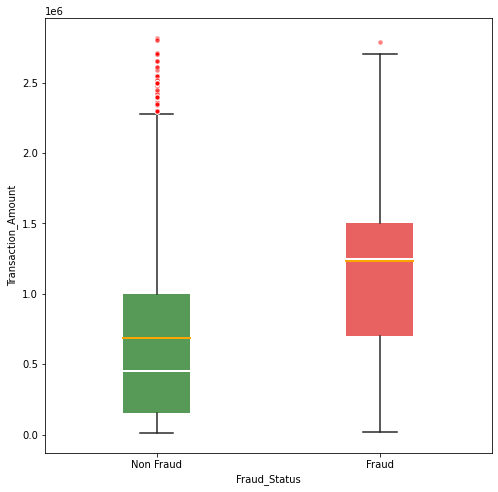

<Figure size 432x288 with 0 Axes>

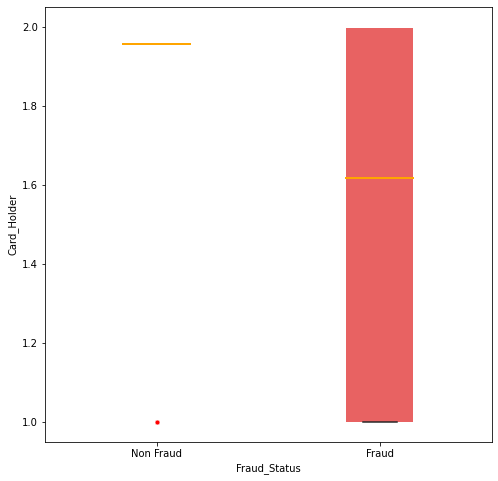

<Figure size 432x288 with 0 Axes>

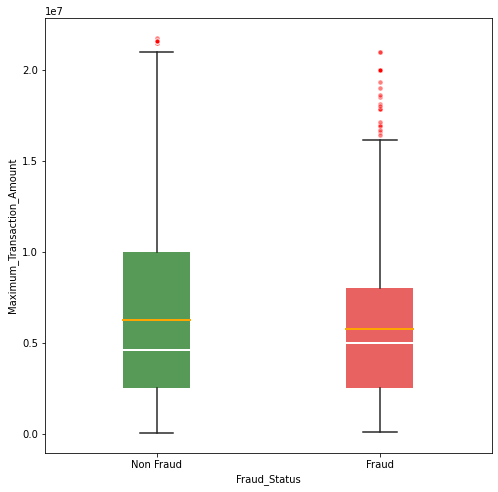

<Figure size 432x288 with 0 Axes>

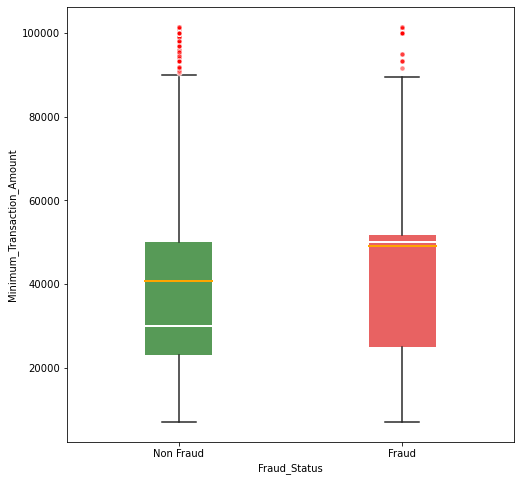

<Figure size 432x288 with 0 Axes>

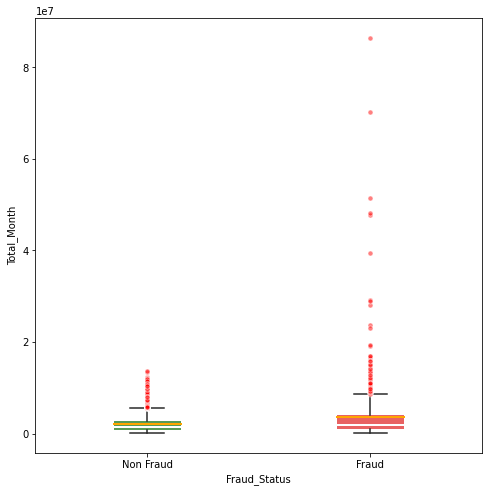

<Figure size 432x288 with 0 Axes>

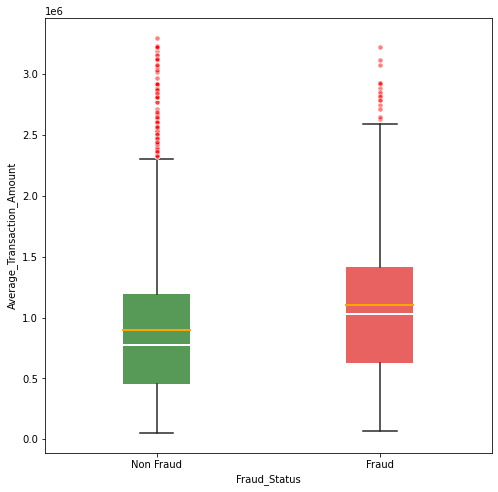

<Figure size 432x288 with 0 Axes>

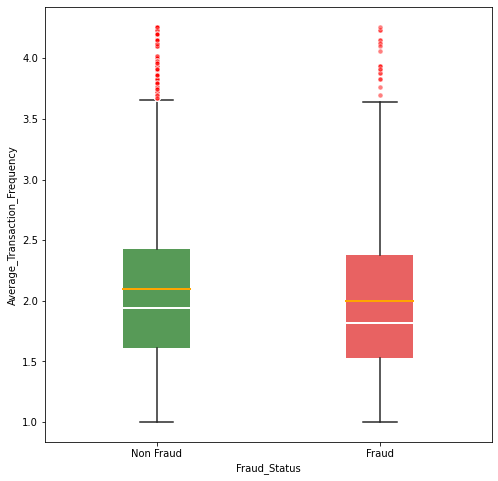

In [ ]:
for var in glm_vars:
    plt.figure()
    target_boxplot(data2, var, target=response, labels=['Non Fraud', 'Fraud'])

### Model

In [ ]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM Zulu11.43+55-CA (build 11.0.9.1+1-LTS, mixed mode)
  Starting server from C:\Users\Hp\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Hp\AppData\Local\Temp\tmpj81d_iln
  JVM stdout: C:\Users\Hp\AppData\Local\Temp\tmpj81d_iln\h2o_Hp_started_from_python.out
  JVM stderr: C:\Users\Hp\AppData\Local\Temp\tmpj81d_iln\h2o_Hp_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,14 secs
H2O_cluster_timezone:,Asia/Bangkok
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.2
H2O_cluster_version_age:,2 months and 15 days
H2O_cluster_name:,H2O_from_python_Hp_fg47qj
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,994 Mb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [ ]:
from h2o.automl import H2OAutoML

In [ ]:
def timer(start_time, header='\nProgram Schedule'):
    end_time = pd.to_datetime('now') + pd.Timedelta('07:00:00')
    print(header)
    print(start_time.strftime('Start   : %Y-%m-%d %I:%M:%S %p'))
    print(end_time.strftime('Finish  : %Y-%m-%d %I:%M:%S %p'))
    run_time = str(end_time - start_time)
    idx1 = run_time.find(' ', 3) + 1
    idx2 = run_time.find('.')
    print('Runtime :', run_time[idx1 : idx2], '\n')

In [ ]:
from sklearn.model_selection import train_test_split

start_time = pd.to_datetime('now') + pd.Timedelta('07:00:00')
trains = []
tests = []

for i in range(0,30):
    
    train, test = train_test_split(data2, test_size=0.25, stratify=data2[response])
    train = h2o.H2OFrame(train)
    test = h2o.H2OFrame(test)
    train[response] = train[response].asfactor()
    test[response] = test[response].asfactor()
    trains.append(train)
    tests.append(test)

timer(start_time, header='\nConverting DataFrame to H2O Frame')

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |███████████

# GBM

In [ ]:
start_time = pd.to_datetime('now') + pd.Timedelta('07:00:00')
TBM = H2OAutoML(max_runtime_secs=300, nfolds=10, include_algos=['GBM'])
TBM.train(x=glm_vars, y=response, training_frame=trains[1], validation_frame=tests[1])
timer(start_time, header='\nModeling')


gbm = TBM.leader
gbm

AutoML progress: |
13:16:05.638: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

████████████████████████████████████████████████████████| 100%

Modeling
Start   : 2021-07-02 01:16:04 PM
Finish  : 2021-07-02 01:19:08 PM
Runtime : 00:03:03 

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid__1_AutoML_20210702_131605_model_7


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,62.0,62.0,25282.0,8.0,10.0,9.887096,18.0,36.0,27.67742




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.04654220512966903
RMSE: 0.21573642513416466
LogLoss: 0.16719138867734357
Mean Per-Class Error: 0.1419029726100831
AUC: 0.9371376768461662
AUCPR: 0.7371270268704428
Gini: 0.8742753536923324

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2920165281095493: 


,,0,1,Error,Rate
0,0,4925.0,152.0,0.0299,(152.0/5077.0)
1,1,187.0,359.0,0.3425,(187.0/546.0)
2,Total,5112.0,511.0,0.0603,(339.0/5623.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.292017,0.679281,173.0
1,max f2,0.158663,0.704523,233.0
2,max f0point5,0.465078,0.740944,118.0
3,max accuracy,0.450364,0.942380,122.0
4,max precision,0.974982,1.000000,0.0
5,max recall,0.008640,1.000000,388.0
6,max specificity,0.974982,1.000000,0.0
7,max absolute_mcc,0.292017,0.646482,173.0
8,max min_per_class_accuracy,0.111882,0.857143,263.0
9,max mean_per_class_accuracy,0.114939,0.858097,261.0



Gains/Lift Table: Avg response rate:  9.71 %, avg score:  9.80 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010137,0.852386,10.298535,10.298535,1.000000,0.915147,1.000000,0.915147,0.104396,0.104396,929.853480,929.853480,0.104396
1,2,0.020096,0.761946,9.746828,10.025122,0.946429,0.806377,0.973451,0.861244,0.097070,0.201465,874.682758,902.512237,0.200874
2,3,0.030055,0.663781,8.643413,9.567278,0.839286,0.714391,0.928994,0.812582,0.086081,0.287546,764.341313,856.727789,0.285182
3,4,0.040014,0.596615,8.459511,9.291567,0.821429,0.632971,0.902222,0.767879,0.084249,0.371795,745.951073,829.156695,0.367462
4,5,0.050151,0.515470,7.407718,8.910789,0.719298,0.555927,0.865248,0.725038,0.075092,0.446886,640.771801,791.078897,0.439402
5,6,0.100124,0.264746,4.544549,6.731547,0.441281,0.365877,0.653641,0.545776,0.227106,0.673993,354.454916,573.154672,0.635584
6,7,0.150098,0.166314,1.979078,5.149267,0.192171,0.208257,0.500000,0.433403,0.098901,0.772894,97.907786,414.926740,0.689774
7,8,0.200071,0.119322,1.392684,4.210956,0.135231,0.141533,0.408889,0.360501,0.069597,0.842491,39.268442,321.095645,0.711508
8,9,0.300018,0.065605,0.696342,3.040113,0.067616,0.088231,0.295199,0.269798,0.069597,0.912088,-30.365779,204.011282,0.677894
9,10,0.399964,0.044223,0.439795,2.390322,0.042705,0.053283,0.232103,0.215693,0.043956,0.956044,-56.020492,139.032244,0.615882




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.05864613600560359
RMSE: 0.242169643030673
LogLoss: 0.21446307183087174
Mean Per-Class Error: 0.1867596372912379
AUC: 0.8607355432517866
AUCPR: 0.5734956608925144
Gini: 0.7214710865035732

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29304711197391653: 


,,0,1,Error,Rate
0,0,1624.0,69.0,0.0408,(69.0/1693.0)
1,1,75.0,107.0,0.4121,(75.0/182.0)
2,Total,1699.0,176.0,0.0768,(144.0/1875.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.293047,0.597765,134.0
1,max f2,0.091978,0.618257,251.0
2,max f0point5,0.475323,0.622896,82.0
3,max accuracy,0.489366,0.926933,78.0
4,max precision,0.962822,1.000000,0.0
5,max recall,0.003958,1.000000,395.0
6,max specificity,0.962822,1.000000,0.0
7,max absolute_mcc,0.293047,0.555421,134.0
8,max min_per_class_accuracy,0.093929,0.808624,250.0
9,max mean_per_class_accuracy,0.087517,0.813240,255.0



Gains/Lift Table: Avg response rate:  9.71 %, avg score:  9.96 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010133,0.853104,9.217756,9.217756,0.894737,0.903508,0.894737,0.903508,0.093407,0.093407,821.775593,821.775593,0.092225
1,2,0.020267,0.748090,7.048872,8.133314,0.684211,0.782531,0.789474,0.843019,0.071429,0.164835,604.887218,713.331405,0.160110
2,3,0.030400,0.682520,5.964430,7.410353,0.578947,0.714543,0.719298,0.800194,0.060440,0.225275,496.443031,641.035281,0.215824
3,4,0.040000,0.619667,8.012821,7.554945,0.777778,0.651214,0.733333,0.764439,0.076923,0.302198,701.282051,655.494505,0.290384
4,5,0.050133,0.498562,7.048872,7.452654,0.684211,0.565693,0.723404,0.724267,0.071429,0.373626,604.887218,645.265373,0.358269
5,6,0.100267,0.266184,4.274316,5.863485,0.414894,0.363034,0.569149,0.543650,0.214286,0.587912,327.431611,486.348492,0.540068
6,7,0.150400,0.167142,1.643968,4.456979,0.159574,0.210052,0.432624,0.432451,0.082418,0.670330,64.396773,345.697919,0.575823
7,8,0.200000,0.123199,1.218540,3.653846,0.118280,0.144607,0.354667,0.361066,0.060440,0.730769,21.853952,265.384615,0.587828
8,9,0.300267,0.071952,1.041180,2.781410,0.101064,0.094468,0.269982,0.272042,0.104396,0.835165,4.117957,178.141042,0.592401
9,10,0.400000,0.046292,0.385644,2.184066,0.037433,0.057412,0.212000,0.218528,0.038462,0.873626,-61.435623,118.406593,0.524542




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.056799491054542545
RMSE: 0.23832643801001716
LogLoss: 0.20780294813224284
Mean Per-Class Error: 0.19657025398605077
AUC: 0.8691603518272811
AUCPR: 0.6061849498915273
Gini: 0.7383207036545623

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3312383078209302: 


,,0,1,Error,Rate
0,0,4923.0,154.0,0.0303,(154.0/5077.0)
1,1,266.0,280.0,0.4872,(266.0/546.0)
2,Total,5189.0,434.0,0.0747,(420.0/5623.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.331238,0.571429,152.0
1,max f2,0.145347,0.624204,237.0
2,max f0point5,0.505338,0.660025,103.0
3,max accuracy,0.505338,0.931176,103.0
4,max precision,0.987097,1.000000,0.0
5,max recall,0.004631,1.000000,395.0
6,max specificity,0.987097,1.000000,0.0
7,max absolute_mcc,0.349469,0.535555,146.0
8,max min_per_class_accuracy,0.083111,0.796730,282.0
9,max mean_per_class_accuracy,0.145347,0.803430,237.0



Gains/Lift Table: Avg response rate:  9.71 %, avg score:  9.61 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010137,0.841263,9.937183,9.937183,0.964912,0.910226,0.964912,0.910226,0.100733,0.100733,893.718270,893.718270,0.100339
1,2,0.020096,0.736426,8.643413,9.296023,0.839286,0.783235,0.902655,0.847293,0.086081,0.186813,764.341313,829.602256,0.184647
2,3,0.030055,0.649297,7.907804,8.836021,0.767857,0.694840,0.857988,0.796776,0.078755,0.265568,690.780351,783.602098,0.260841
3,4,0.040014,0.564767,6.988291,8.376142,0.678571,0.603025,0.813333,0.748553,0.069597,0.335165,598.829147,737.614164,0.326892
4,5,0.050151,0.482051,6.504338,7.997798,0.631579,0.525303,0.776596,0.703428,0.065934,0.401099,550.433777,699.779830,0.388690
5,6,0.100124,0.249584,3.261814,5.634012,0.316726,0.345242,0.547069,0.524653,0.163004,0.564103,226.181351,463.401193,0.513876
6,7,0.150098,0.167903,2.272275,4.514761,0.220641,0.203174,0.438389,0.417620,0.113553,0.677656,127.227458,351.476052,0.584293
7,8,0.200071,0.117654,1.172787,3.680010,0.113879,0.140820,0.357333,0.348482,0.058608,0.736264,17.278688,268.000977,0.593857
8,9,0.300018,0.069180,0.934565,2.765404,0.090747,0.089526,0.268524,0.262214,0.093407,0.829670,-6.543545,176.540383,0.586613
9,10,0.399964,0.045451,0.476445,2.193418,0.046263,0.055776,0.212984,0.210628,0.047619,0.877289,-52.355533,119.341848,0.528658




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,accuracy,0.9293939,0.013253228,0.9396092,0.9396092,0.9271758,0.9074733,0.9252669,0.93594307,0.9466192,0.94128114,0.9145908,0.9163701
1,auc,0.86940396,0.030552698,0.8611455,0.87780243,0.8285953,0.8773579,0.87948716,0.88734084,0.9364682,0.8592006,0.85192597,0.83471596
2,aucpr,0.6100494,0.06554882,0.55938107,0.6757703,0.5251494,0.6087997,0.6021171,0.6452866,0.7333463,0.64627993,0.55752486,0.54683894
3,err,0.07060612,0.013253228,0.060390763,0.060390763,0.07282416,0.09252669,0.07473309,0.06405694,0.053380784,0.05871886,0.085409254,0.08362989
4,err_count,39.7,7.4393845,34.0,34.0,41.0,52.0,42.0,36.0,30.0,33.0,48.0,47.0
5,f0point5,0.64290035,0.05123464,0.6424581,0.69124424,0.5721393,0.5907781,0.61752987,0.68085104,0.6938776,0.71428573,0.5813953,0.64444447
6,f1,0.5984534,0.049457647,0.575,0.63829786,0.52873564,0.6119403,0.59615386,0.64,0.6938776,0.5925926,0.5555556,0.552381
7,f2,0.5634812,0.06868254,0.520362,0.5928854,0.491453,0.6346749,0.5762082,0.6037736,0.6938776,0.5063291,0.5319149,0.48333332
8,lift_top_group,9.947597,1.8488157,11.978724,10.622642,11.489796,8.920635,10.218182,8.515152,11.469388,10.807693,9.689655,5.7641025
9,logloss,0.2078071,0.028632987,0.1948042,0.19117258,0.21415502,0.22997302,0.20692244,0.19732209,0.15439227,0.19708005,0.23223524,0.260014



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-07-02 13:18:27,1 min 10.037 sec,0.0,0.296096,0.318667,0.500000,0.097101,1.000000,0.902899,0.296049,0.318590,0.500000,0.097067,1.000000,0.902933
1,,2021-07-02 13:18:27,1 min 10.115 sec,5.0,0.269568,0.256720,0.879420,0.539410,9.765852,0.104748,0.269773,0.257866,0.852210,0.497368,8.897353,0.107733
2,,2021-07-02 13:18:27,1 min 10.224 sec,10.0,0.256919,0.233801,0.888007,0.575707,9.756507,0.086075,0.259218,0.238976,0.858519,0.519812,8.897353,0.098133
3,,2021-07-02 13:18:27,1 min 10.318 sec,15.0,0.248255,0.219287,0.895178,0.603512,9.937183,0.081096,0.253164,0.229025,0.857996,0.536227,9.217756,0.091200
4,,2021-07-02 13:18:27,1 min 10.412 sec,20.0,0.241729,0.208406,0.902560,0.631954,9.937183,0.073626,0.249560,0.222813,0.862191,0.540785,8.675535,0.081067
5,,2021-07-02 13:18:28,1 min 10.787 sec,25.0,0.236407,0.199982,0.908980,0.649849,10.117859,0.071848,0.247454,0.219704,0.862396,0.544019,8.675535,0.082667
6,,2021-07-02 13:18:28,1 min 10.881 sec,30.0,0.232542,0.193700,0.912880,0.660655,10.117859,0.071670,0.246150,0.217816,0.862921,0.546519,8.675535,0.080533
7,,2021-07-02 13:18:28,1 min 10.974 sec,35.0,0.229111,0.188027,0.917640,0.676455,10.298535,0.066690,0.245442,0.217074,0.862217,0.545860,8.675535,0.089067
8,,2021-07-02 13:18:28,1 min 11.084 sec,40.0,0.226405,0.183848,0.920293,0.689280,10.298535,0.064023,0.244619,0.216180,0.862008,0.555205,8.675535,0.081067
9,,2021-07-02 13:18:28,1 min 11.256 sec,45.0,0.223569,0.179332,0.924973,0.701965,10.298535,0.062244,0.243897,0.215752,0.861325,0.562185,8.675535,0.084267



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Card_Holder,316.253082,1.000000,0.356662
1,Transaction_Amount,197.292191,0.623843,0.222501
2,Total_Month,102.079178,0.322777,0.115122
3,Maximum_Transaction_Amount,92.479851,0.292424,0.104296
4,Average_Transaction_Frequency,72.915298,0.230560,0.082232
5,Average_Transaction_Amount,62.071728,0.196272,0.070003
6,Minimum_Transaction_Amount,43.610989,0.137899,0.049183


In [ ]:
def model_performance(model, threshold, train=False, valid=True, xval=False, header='Value', style=False):
    f1 = model.F1(train=train, valid=valid, xval=xval, thresholds=threshold)[0][1]
    precision = model.precision(train=train, valid=valid, xval=xval, thresholds=threshold)[0][1]
    sensitivity = model.recall(train=train, valid=valid, xval=xval, thresholds=threshold)[0][1]
    accuracy = model.accuracy(train=train, valid=valid, xval=xval, thresholds=threshold)[0][1]
    
    metrics = {'Threshold': threshold, 'F1': f1, 'Precision': precision, 'Sensitivity': sensitivity, 'Accuracy': accuracy}
    performance = pd.DataFrame(metrics.values(), columns=[header], index=metrics.keys())
    
    if style:
        performance = performance.style.format('{:.2%}')
        
    return performance

In [ ]:
f1_max_threshold = gbm.F1(valid=True)[0][0]
gbm_model_performance = model_performance(model=gbm, threshold=f1_max_threshold, header='GLM')
model_performance(model=gbm, threshold=f1_max_threshold, style=True)

,Value
Threshold,29.30%
F1,59.78%
Precision,60.80%
Sensitivity,58.79%
Accuracy,92.32%


#### Global Interpretability

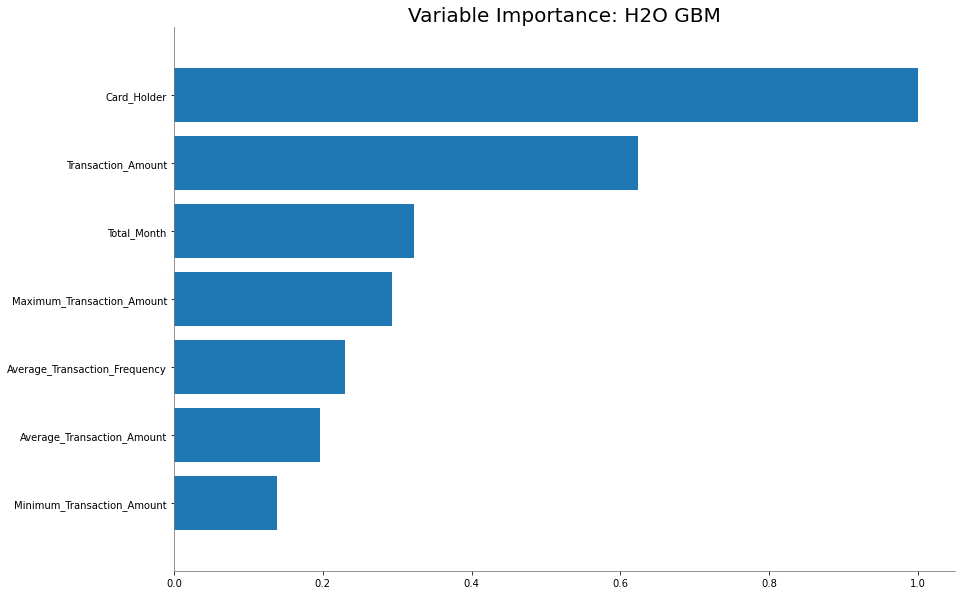

In [ ]:
gbm.varimp_plot()

In [ ]:
def variable_importances(model, limit=0.95):
    varimp = model.varimp(use_pandas=True)
    varimp['cumulative'] = varimp['percentage'].cumsum()
    varimp = varimp[varimp['cumulative'] <= limit].copy()
    
    return varimp

In [ ]:
varimp_gbm = variable_importances(gbm, limit=0.99)
varimp_gbm

,variable,relative_importance,scaled_importance,percentage,cumulative
0,Card_Holder,316.253082,1.000000,0.356662,0.356662
1,Transaction_Amount,197.292191,0.623843,0.222501,0.579163
2,Total_Month,102.079178,0.322777,0.115122,0.694285
3,Maximum_Transaction_Amount,92.479851,0.292424,0.104296,0.798582
4,Average_Transaction_Frequency,72.915298,0.230560,0.082232,0.880814
5,Average_Transaction_Amount,62.071728,0.196272,0.070003,0.950817


### GBM run 30x

In [ ]:
from h2o.estimators.random_forest import H2ORandomForestEstimator
model=[]
for i in range (30):
    start_time = pd.to_datetime('now') + pd.Timedelta('07:00:00')
    gbm = H2OAutoML(max_runtime_secs=300, nfolds=10, include_algos=['GBM'])
    gbm.train(x=glm_vars, y=response, training_frame=trains[i], validation_frame=tests[i])
    timer(start_time, header='\nModeling')
    model.append(gbm)

In [ ]:
model[1]

In [ ]:
f1_total=[]
threshold_total=[]
precision_total=[]
sensitivity_total=[]
accuracy_total=[]
var=[]

for i in range (30):
    f1=model[i].leader.F1(train=False,valid=True,xval=False)[0][1]
    threshold = model[i].leader.F1(train=False,valid=True,xval=False)[0][0]
    precision=model[i].leader.precision(train=False,valid=True,xval=False,thresholds=threshold)[0][1]
    sensitivity=model[i].leader.sensitivity(train=False,valid=True,xval=False,thresholds=threshold)[0][1]
    accuracy=model[i].leader.accuracy(train=False,valid=True,xval=False,thresholds=threshold)[0][1]
    
    f1_total.append(f1)
    threshold_total.append(threshold)
    precision_total.append(precision)
    sensitivity_total.append(sensitivity)
    accuracy_total.append(accuracy)
    
    vars = variable_importances(model[i].leader,limit=1)
    var.append(vars)

In [ ]:
gbm=pd.DataFrame({'threshold':threshold_total,'sensitivity':sensitivity_total,'precision':precision_total
                            ,'accuracy':accuracy_total,'F1':f1_total})
gbm_mean=gbm.copy()
gbm_mean['threshold_mean']=gbm_mean['threshold'].mean()
gbm_mean['threshold_std']=gbm_mean['threshold'].std()
gbm_mean['sensitivity_mean']=gbm_mean['sensitivity'].mean()
gbm_mean['sensitivity_std']=gbm_mean['sensitivity'].std()
gbm_mean['precision_mean']=gbm_mean['precision'].mean()
gbm_mean['precision_std']=gbm_mean['precision'].std()
gbm_mean['accuracy_mean']=gbm_mean['accuracy'].mean()
gbm_mean['accuracy_std']=gbm_mean['accuracy'].std()
gbm_mean['F1_mean']=gbm_mean['F1'].mean()
gbm_mean['F1_std']=gbm_mean['F1'].std()
gbm_mean.drop(columns=random_forest.columns,axis=1,inplace=True)

In [ ]:
gbm_mean=gbm_mean.head(1)
gbm_mean

In [ ]:
varimp = var[0]
for i in range (1,30):
    varimp=varimp.append(var[i])

In [ ]:
varimp = varimp.groupby(['variable'])[['percentage']].mean().sort_values(by='percentage', ascending= False)
varimp

### GLM

In [ ]:
start_time = pd.to_datetime('now') + pd.Timedelta('07:00:00')
GLM = H2OAutoML(max_runtime_secs=300, nfolds=10, include_algos=['GLM'])
GLM.train(x=glm_vars, y=response, training_frame=trains[1, validation_frame=tests[1])
timer(start_time, header='\nModeling')

AutoML progress: |
13:55:46.907: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

████████████████████████████████████████████████████████| 100%

Modeling
Start   : 2021-07-02 01:55:46 PM
Finish  : 2021-07-02 01:56:00 PM
Runtime : 00:00:13 



In [ ]:
GLM.leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GLM_1_AutoML_20210702_135546,0.82502,0.235106,0.512599,0.306275,0.254373,0.0647054


In [ ]:
base_model = GLM.leader
base_model

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_1_AutoML_20210702_135546


GLM Model: summary


,,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,Ridge ( lambda = 1.939E-4 ),"nlambda = 30, lambda.max = 11.122, lambda.min = 1.939E-4, lambda.1...",7,7,45,automl_training_py_321_sid_b780




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.06444041226168061
RMSE: 0.25385116163153676
LogLoss: 0.23415977339675464
Null degrees of freedom: 6747
Residual degrees of freedom: 6740
Null deviance: 4299.658493903659
Residual deviance: 3160.220301762601
AIC: 3176.220301762601
AUC: 0.8266710766829161
AUCPR: 0.5158605050516186
Gini: 0.6533421533658321

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3226469575685584: 


,,0,1,Error,Rate
0,0,5886.0,207.0,0.034,(207.0/6093.0)
1,1,378.0,277.0,0.5771,(378.0/655.0)
2,Total,6264.0,484.0,0.0867,(585.0/6748.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.322647,0.486392,149.0
1,max f2,0.085107,0.554520,271.0
2,max f0point5,0.414368,0.574011,119.0
3,max accuracy,0.487637,0.921903,96.0
4,max precision,0.999720,1.000000,0.0
5,max recall,0.006015,1.000000,395.0
6,max specificity,0.999720,1.000000,0.0
7,max absolute_mcc,0.414368,0.455442,119.0
8,max min_per_class_accuracy,0.074382,0.757591,284.0
9,max mean_per_class_accuracy,0.085107,0.765213,271.0



Gains/Lift Table: Avg response rate:  9.71 %, avg score:  9.71 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010077,0.826431,10.150786,10.150786,0.985294,0.950748,0.985294,0.950748,0.102290,0.102290,915.078581,915.078581,0.102126
1,2,0.020006,0.678332,7.995807,9.081278,0.776119,0.743796,0.881481,0.848038,0.079389,0.181679,699.580722,808.127792,0.179053
2,3,0.030083,0.546968,6.060171,8.069281,0.588235,0.614883,0.783251,0.769937,0.061069,0.242748,506.017063,706.928139,0.235527
3,4,0.040012,0.480671,6.150621,7.593169,0.597015,0.511601,0.737037,0.705832,0.061069,0.303817,515.062094,659.316935,0.292164
4,5,0.050089,0.421554,4.545128,6.979954,0.441176,0.453538,0.677515,0.655074,0.045802,0.349618,354.512797,597.995393,0.331729
5,6,0.100030,0.221715,2.506789,4.746685,0.243323,0.310680,0.460741,0.483132,0.125191,0.474809,150.678868,374.668476,0.415068
6,7,0.150119,0.140162,2.042170,3.844290,0.198225,0.174635,0.373149,0.380198,0.102290,0.577099,104.216993,284.428988,0.472881
7,8,0.200059,0.103898,1.559100,3.273839,0.151335,0.120609,0.317778,0.315397,0.077863,0.654962,55.910028,227.383885,0.503805
8,9,0.300089,0.072158,1.159962,2.569213,0.112593,0.085357,0.249383,0.238717,0.116031,0.770992,15.996155,156.921308,0.521526
9,10,0.399970,0.057097,0.412703,2.030685,0.040059,0.063813,0.197110,0.195040,0.041221,0.812214,-58.729699,103.068482,0.456560




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.06635730482805705
RMSE: 0.25759911651257084
LogLoss: 0.24176712333538217
Null degrees of freedom: 749
Residual degrees of freedom: 742
Null deviance: 478.7764398595879
Residual deviance: 362.6506850030733
AIC: 378.6506850030733
AUC: 0.8105764755873008
AUCPR: 0.4952224782660976
Gini: 0.6211529511746017

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36025322710617086: 


,,0,1,Error,Rate
0,0,661.0,16.0,0.0236,(16.0/677.0)
1,1,45.0,28.0,0.6164,(45.0/73.0)
2,Total,706.0,44.0,0.0813,(61.0/750.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.360253,0.478632,42.0
1,max f2,0.092521,0.550756,149.0
2,max f0point5,0.545617,0.593220,25.0
3,max accuracy,0.575386,0.924000,23.0
4,max precision,0.998048,1.000000,0.0
5,max recall,0.012243,1.000000,377.0
6,max specificity,0.998048,1.000000,0.0
7,max absolute_mcc,0.545617,0.454152,25.0
8,max min_per_class_accuracy,0.072703,0.750369,183.0
9,max mean_per_class_accuracy,0.092521,0.760689,149.0



Gains/Lift Table: Avg response rate:  9.73 %, avg score:  9.48 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010667,0.800082,10.273973,10.273973,1.000000,0.868851,1.000000,0.868851,0.109589,0.109589,927.397260,927.397260,0.109589
1,2,0.020000,0.672653,7.338552,8.904110,0.714286,0.726022,0.866667,0.802197,0.068493,0.178082,633.855186,790.410959,0.175128
2,3,0.030667,0.577022,7.705479,8.487195,0.750000,0.615195,0.826087,0.737153,0.082192,0.260274,670.547945,748.719476,0.254366
3,4,0.040000,0.500120,2.935421,7.191781,0.285714,0.543752,0.700000,0.692026,0.027397,0.287671,193.542074,619.178082,0.274377
4,5,0.050667,0.411398,5.136986,6.759193,0.500000,0.462663,0.657895,0.643739,0.054795,0.342466,413.698630,575.919250,0.323263
5,6,0.100000,0.208871,2.499074,4.657534,0.243243,0.288896,0.453333,0.468683,0.123288,0.465753,149.907442,365.753425,0.405192
6,7,0.150667,0.129146,1.351839,3.545884,0.131579,0.161179,0.345133,0.365275,0.068493,0.534247,35.183850,254.588435,0.424941
7,8,0.200000,0.101318,1.943725,3.150685,0.189189,0.113244,0.306667,0.303107,0.095890,0.630137,94.372455,215.068493,0.476518
8,9,0.300000,0.072249,1.232877,2.511416,0.120000,0.086290,0.244444,0.230835,0.123288,0.753425,23.287671,151.141553,0.502317
9,10,0.400000,0.056509,0.136986,1.917808,0.013333,0.063789,0.186667,0.189073,0.013699,0.767123,-86.301370,91.780822,0.406710




ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.0647053828226454
RMSE: 0.2543725276492047
LogLoss: 0.23510642445002752
Null degrees of freedom: 6747
Residual degrees of freedom: 6740
Null deviance: 4302.547642397855
Residual deviance: 3172.9963043775715
AIC: 3188.9963043775715
AUC: 0.8250195757113343
AUCPR: 0.5125989678243528
Gini: 0.6500391514226687

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3168335551323782: 


,,0,1,Error,Rate
0,0,5877.0,216.0,0.0355,(216.0/6093.0)
1,1,378.0,277.0,0.5771,(378.0/655.0)
2,Total,6255.0,493.0,0.088,(594.0/6748.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.316834,0.482578,150.0
1,max f2,0.082706,0.551732,272.0
2,max f0point5,0.432712,0.574684,111.0
3,max accuracy,0.492140,0.921755,91.0
4,max precision,0.999704,1.000000,0.0
5,max recall,0.004805,1.000000,396.0
6,max specificity,0.999704,1.000000,0.0
7,max absolute_mcc,0.426736,0.453381,113.0
8,max min_per_class_accuracy,0.075428,0.760305,281.0
9,max mean_per_class_accuracy,0.082706,0.763942,272.0



Gains/Lift Table: Avg response rate:  9.71 %, avg score:  9.70 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010077,0.830880,9.999282,9.999282,0.970588,0.949938,0.970588,0.949938,0.100763,0.100763,899.928154,899.928154,0.100435
1,2,0.020006,0.678278,7.995807,9.004965,0.776119,0.742818,0.874074,0.847145,0.079389,0.180153,699.580722,800.496466,0.177363
2,3,0.030083,0.546777,5.908666,7.967781,0.573529,0.612494,0.773399,0.768543,0.059542,0.239695,490.866637,696.778099,0.232145
3,4,0.040012,0.482426,6.304386,7.555013,0.611940,0.509678,0.733333,0.704306,0.062595,0.302290,530.438646,655.501272,0.290473
4,5,0.050089,0.423602,4.848137,7.010434,0.470588,0.454673,0.680473,0.654084,0.048855,0.351145,384.813651,601.043408,0.333420
5,6,0.100030,0.222937,2.445647,4.731422,0.237389,0.311407,0.459259,0.482999,0.122137,0.473282,144.564750,373.142211,0.413378
6,7,0.150119,0.138375,2.042170,3.834120,0.198225,0.174353,0.372162,0.380016,0.102290,0.575573,104.216993,283.411980,0.471190
7,8,0.200059,0.104289,1.497959,3.250945,0.145401,0.120425,0.315556,0.315214,0.074809,0.650382,49.795909,225.094487,0.498732
8,9,0.300089,0.072367,1.190487,2.564126,0.115556,0.085419,0.248889,0.238616,0.119084,0.769466,19.048685,156.412553,0.519835
9,10,0.399970,0.057273,0.443274,2.034502,0.043027,0.063908,0.197481,0.194988,0.044275,0.813740,-55.672639,103.450189,0.458251




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,accuracy,0.9017501,0.040485077,0.89037037,0.8666667,0.94666666,0.90074074,0.8103704,0.93185186,0.9437037,0.91407406,0.8976261,0.91543025
1,auc,0.8258732,0.026387932,0.81792146,0.858026,0.8612013,0.81375337,0.8118192,0.81098753,0.78405166,0.8411479,0.80401933,0.85580415
2,aucpr,0.5177869,0.05757394,0.49094385,0.537411,0.62143546,0.4855159,0.4237449,0.49451774,0.47764337,0.5320773,0.5210912,0.5934886
3,err,0.09824992,0.040485077,0.10962963,0.13333334,0.053333335,0.09925926,0.18962963,0.06814815,0.056296296,0.08592593,0.10237389,0.08456973
4,err_count,66.3,27.329472,74.0,90.0,36.0,67.0,128.0,46.0,38.0,58.0,69.0,57.0
5,f0point5,0.541887,0.112767145,0.45918366,0.44954127,0.74285716,0.51155114,0.329429,0.5913978,0.60402685,0.562701,0.55,0.6181818
6,f1,0.505394,0.04831339,0.49315068,0.5212766,0.59090906,0.48062015,0.41284403,0.4888889,0.4864865,0.546875,0.4888889,0.544
7,f2,0.49309412,0.06706782,0.5325444,0.62025315,0.49056605,0.45321637,0.55282557,0.41666666,0.40723982,0.5319149,0.44,0.4857143
8,lift_top_group,10.049577,1.7500098,9.040178,9.782609,11.440678,8.148893,9.183674,11.637931,13.77551,10.074627,8.425,8.986667
9,logloss,0.2349453,0.024276251,0.23603114,0.23252136,0.19818714,0.25907478,0.24569696,0.22332785,0.2027248,0.23148377,0.28003958,0.24036562



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test,deviance_xval,deviance_se,...,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-07-02 13:55:56,0.000 sec,2,.11E2,8,0.633245,0.634822,0.634092,0.018705,...,,,,,,,,,,
1,,2021-07-02 13:55:56,0.016 sec,4,.69E1,8,0.630916,0.632719,0.631992,0.018648,...,,,,,,,,,,
2,,2021-07-02 13:55:56,0.016 sec,6,.43E1,8,0.627268,0.629420,0.628694,0.018558,...,,,,,,,,,,
3,,2021-07-02 13:55:56,0.031 sec,8,.27E1,8,0.621652,0.624333,0.623587,0.018420,...,,,,,,,,,,
4,,2021-07-02 13:55:56,0.031 sec,10,.17E1,8,0.613240,0.616686,0.615889,0.018211,...,,,,,,,,,,
5,,2021-07-02 13:55:56,0.031 sec,12,.1E1,8,0.601213,0.605683,0.604753,0.017909,...,,,,,,,,,,
6,,2021-07-02 13:55:56,0.047 sec,14,.64E0,8,0.585193,0.590871,0.589654,0.017498,...,,,,,,,,,,
7,,2021-07-02 13:55:56,0.047 sec,16,.4E0,8,0.565900,0.572836,0.571032,0.016995,...,,,,,,,,,,
8,,2021-07-02 13:55:56,0.062 sec,18,.25E0,8,0.545453,0.553586,0.550716,0.016471,...,,,,,,,,,,
9,,2021-07-02 13:55:56,0.062 sec,20,.15E0,8,0.526543,0.535809,0.531393,0.016023,...,,,,,,,,,,



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Total_Month,1.406749,1.000000,0.337440
1,Average_Transaction_Frequency,0.740915,0.526686,0.177725
2,Card_Holder,0.694328,0.493569,0.166550
3,Transaction_Amount,0.573681,0.407806,0.137610
4,Maximum_Transaction_Amount,0.555647,0.394987,0.133284
5,Average_Transaction_Amount,0.193847,0.137798,0.046499
6,Minimum_Transaction_Amount,0.003719,0.002644,0.000892


In [ ]:
def model_performance(model, threshold, train=False, valid=True, xval=False, header='Value', style=False):
    f1 = model.F1(train=train, valid=valid, xval=xval, thresholds=threshold)[0][1]
    precision = model.precision(train=train, valid=valid, xval=xval, thresholds=threshold)[0][1]
    sensitivity = model.recall(train=train, valid=valid, xval=xval, thresholds=threshold)[0][1]
    accuracy = model.accuracy(train=train, valid=valid, xval=xval, thresholds=threshold)[0][1]
    
    metrics = {'Threshold': threshold, 'F1': f1, 'Precision': precision, 'Sensitivity': sensitivity, 'Accuracy': accuracy}
    performance = pd.DataFrame(metrics.values(), columns=[header], index=metrics.keys())
    
    if style:
        performance = performance.style.format('{:.2%}')
        
    return performance

In [ ]:
f1_max_threshold = base_model.F1(valid=True)[0][0]
base_model_performance = model_performance(model=base_model, threshold=f1_max_threshold, header='GLM')
model_performance(model=base_model, threshold=f1_max_threshold, style=True)

,Value
Threshold,36.03%
F1,47.86%
Precision,63.64%
Sensitivity,38.36%
Accuracy,91.87%


### Explainability
#### Global Interpretability

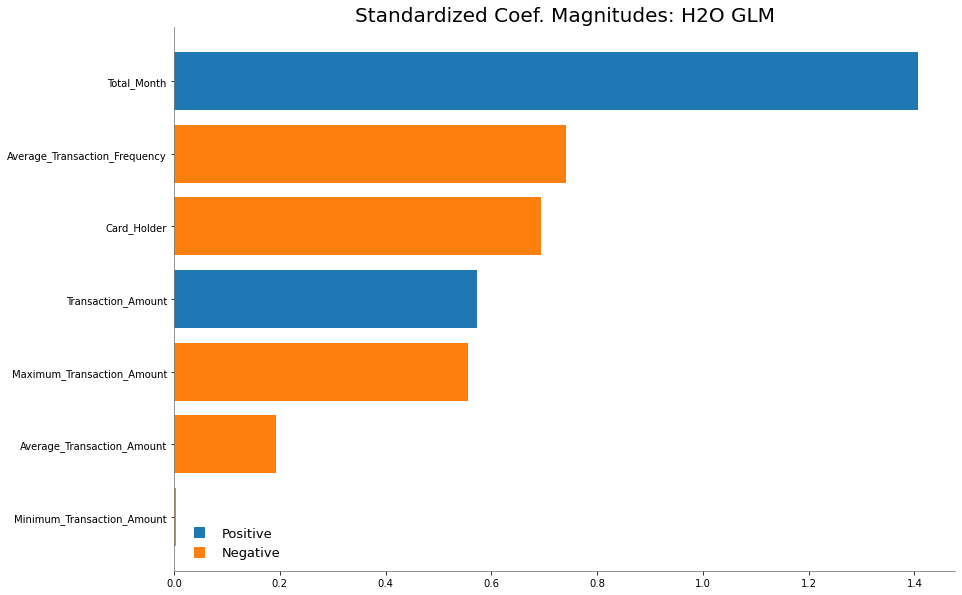

In [ ]:
base_model.std_coef_plot(num_of_features=10)

In [ ]:
def variable_importances(model,limit=0.95):
    varimp = model.varimp(use_pandas=True)
    varimp['cumulative'] = varimp['percentage'].cumsum()
    varimp = varimp[varimp['cumulative'] <= limit].copy()
    
    return varimp

In [ ]:
varimp_base_model = variable_importances(base_model, limit=0.99)
varimp_base_model

,variable,relative_importance,scaled_importance,percentage,cumulative
0,Total_Month,1.406749,1.000000,0.337440,0.337440
1,Average_Transaction_Frequency,0.740915,0.526686,0.177725,0.515165
2,Card_Holder,0.694328,0.493569,0.166550,0.681715
3,Transaction_Amount,0.573681,0.407806,0.137610,0.819325
4,Maximum_Transaction_Amount,0.555647,0.394987,0.133284,0.952609


### GLM run 30x

In [ ]:
from h2o.automl import H2OAutoML
from h2o.estimators.random_forest import H2ORandomForestEstimator
model=[]
for i in range (30):
    GLM = H2OAutoML(max_runtime_secs=300, nfolds=10, include_algos=['GLM'])
    GLM.train(x=vars1, y=response, training_frame=trains[i], validation_frame=tests[i])
    model.append(GLM)

In [ ]:
f1_total=[]
threshold_total=[]
precision_total=[]
sensitivity_total=[]
accuracy_total=[]
var=[]

for i in range (30):
    f1=model[i].leader.F1(train=False,valid=True,xval=False)[0][1]
    threshold = model[i].leader.F1(train=False,valid=True,xval=False)[0][0]
    precision=model[i].leader.precision(train=False,valid=True,xval=False,thresholds=threshold)[0][1]
    sensitivity=model[i].leader.sensitivity(train=False,valid=True,xval=False,thresholds=threshold)[0][1]
    accuracy=model[i].leader.accuracy(train=False,valid=True,xval=False,thresholds=threshold)[0][1]
    
    f1_total.append(f1)
    threshold_total.append(threshold)
    precision_total.append(precision)
    sensitivity_total.append(sensitivity)
    accuracy_total.append(accuracy)
    
    vars = variable_importances(model[i].leader,limit=1)
    var.append(vars)

In [ ]:
glm=pd.DataFrame({'threshold':threshold_total,'sensitivity':sensitivity_total,'precision':precision_total
                            ,'accuracy':accuracy_total,'F1':f1_total})
glm_mean=glm.copy()
glm_mean['threshold_mean']=glm_mean['threshold'].mean()
glm_mean['threshold_std']=glm_mean['threshold'].std()
glm_mean['sensitivity_mean']=glm_mean['sensitivity'].mean()
glm_mean['sensitivity_std']=glm_mean['sensitivity'].std()
glm_mean['precision_mean']=glm_mean['precision'].mean()
glm_mean['precision_std']=glm_mean['precision'].std()
glm_mean['accuracy_mean']=glm_mean['accuracy'].mean()
glm_mean['accuracy_std']=glm_mean['accuracy'].std()
glm_mean['F1_mean']=glm_mean['F1'].mean()
glm_mean['F1_std']=glm_mean['F1'].std()
glm_mean.drop(columns=random_forest.columns,axis=1,inplace=True)

In [ ]:
glm_mean=glm_mean.head(1)
glm_mean

In [ ]:
varimp = var[0]
for i in range (1,30):
    varimp=varimp.append(var[i])

In [ ]:
varimp = varimp.groupby(['variable'])[['percentage']].mean().sort_values(by='percentage', ascending= False)
varimp

### Random Forest

In [ ]:
from h2o.estimators.random_forest import H2ORandomForestEstimator

rf = H2ORandomForestEstimator(ntrees=50, nfolds=10)
rf.train(x=glm_vars, y=response, training_frame=trains[1], validation_frame=tests[1])
rf

drf Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1626271234739_1


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,287228.0,19.0,20.0,19.98,410.0,493.0,452.22




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.06058148595207049
RMSE: 0.2461330655399036
LogLoss: 0.568455960104442
Mean Per-Class Error: 0.22023566021005458
AUC: 0.8417956870783344
AUCPR: 0.5706403703077572
Gini: 0.6835913741566688

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.41071429252624514: 


,,0,1,Error,Rate
0,0,4927.0,150.0,0.0295,(150.0/5077.0)
1,1,273.0,273.0,0.5,(273.0/546.0)
2,Total,5200.0,423.0,0.0752,(423.0/5623.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.410714,0.563467,136.0
1,max f2,0.217277,0.586172,220.0
2,max f0point5,0.431250,0.613871,129.0
3,max accuracy,0.625000,0.925485,74.0
4,max precision,1.000000,1.000000,0.0
5,max recall,0.000000,1.000000,399.0
6,max specificity,1.000000,1.000000,0.0
7,max absolute_mcc,0.410714,0.528136,136.0
8,max min_per_class_accuracy,0.090909,0.769943,307.0
9,max mean_per_class_accuracy,0.137377,0.779764,269.0



Gains/Lift Table: Avg response rate:  9.71 %, avg score: 10.06 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010137,0.898842,10.117859,10.117859,0.982456,0.966651,0.982456,0.966651,0.102564,0.102564,911.785875,911.785875,0.102367
1,2,0.020096,0.780483,7.907804,9.022610,0.767857,0.833537,0.876106,0.900683,0.078755,0.181319,690.780351,802.261013,0.178561
2,3,0.030589,0.705882,6.807506,8.262778,0.661017,0.744010,0.802326,0.846941,0.071429,0.252747,580.750605,726.277792,0.246050
3,4,0.040192,0.611111,7.247117,8.020098,0.703704,0.655332,0.778761,0.801158,0.069597,0.322344,624.711708,702.009790,0.312496
4,5,0.050329,0.545455,4.697577,7.350898,0.456140,0.572579,0.713781,0.755119,0.047619,0.369963,369.757728,635.089763,0.354009
5,6,0.100302,0.315789,3.848207,5.605763,0.373665,0.415976,0.544326,0.586149,0.192308,0.562271,284.820695,460.576274,0.511651
6,7,0.151876,0.210526,1.669073,4.268948,0.162069,0.253610,0.414520,0.473226,0.086081,0.648352,66.907288,326.894768,0.549868
7,8,0.200071,0.147448,1.102057,3.506079,0.107011,0.174139,0.340444,0.401179,0.053114,0.701465,10.205723,250.607896,0.555316
8,9,0.301263,0.076923,0.832570,2.608071,0.080844,0.110273,0.253247,0.303466,0.084249,0.785714,-16.742952,160.807050,0.536551
9,10,0.400854,0.052632,0.496536,2.083466,0.048214,0.060706,0.202307,0.243153,0.049451,0.835165,-50.346350,108.346578,0.481019




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.05939613463258752
RMSE: 0.24371322211276827
LogLoss: 0.3781951577420863
Mean Per-Class Error: 0.21439605875518453
AUC: 0.8517197510109501
AUCPR: 0.5697018898678446
Gini: 0.7034395020219002

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36: 


,,0,1,Error,Rate
0,0,1633.0,60.0,0.0354,(60.0/1693.0)
1,1,85.0,97.0,0.467,(85.0/182.0)
2,Total,1718.0,157.0,0.0773,(145.0/1875.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.360000,0.572271,75.0
1,max f2,0.243985,0.606695,112.0
2,max f0point5,0.531500,0.656371,38.0
3,max accuracy,0.531500,0.930667,38.0
4,max precision,1.000000,1.000000,0.0
5,max recall,0.000000,1.000000,399.0
6,max specificity,1.000000,1.000000,0.0
7,max absolute_mcc,0.360000,0.531765,75.0
8,max min_per_class_accuracy,0.081429,0.780220,248.0
9,max mean_per_class_accuracy,0.243985,0.785604,112.0



Gains/Lift Table: Avg response rate:  9.71 %, avg score:  9.56 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010667,0.860000,8.241758,8.241758,0.800000,0.940083,0.800000,0.940083,0.087912,0.087912,724.175824,724.175824,0.085549
1,2,0.020800,0.740000,8.675535,8.453085,0.842105,0.782632,0.820513,0.863376,0.087912,0.175824,767.553499,745.308538,0.171690
2,3,0.030400,0.635200,8.012821,8.314054,0.777778,0.685472,0.807018,0.807196,0.076923,0.252747,701.282051,731.405437,0.246250
3,4,0.040000,0.568111,7.440476,8.104396,0.722222,0.599370,0.786667,0.757318,0.071429,0.324176,644.047619,710.439560,0.314725
4,5,0.050133,0.502431,5.964430,7.671849,0.578947,0.535343,0.744681,0.712450,0.060440,0.384615,496.443031,667.184943,0.370439
5,6,0.100800,0.300000,3.903991,5.777952,0.378947,0.383965,0.560847,0.547339,0.197802,0.582418,290.399075,477.795221,0.533392
6,7,0.150400,0.189032,1.440092,4.347381,0.139785,0.235632,0.421986,0.444542,0.071429,0.653846,44.009217,334.738134,0.557567
7,8,0.200000,0.134000,0.996987,3.516484,0.096774,0.159366,0.341333,0.373818,0.049451,0.703297,-0.301312,251.648352,0.557402
8,9,0.300267,0.067015,0.931582,2.653319,0.090426,0.097028,0.257549,0.281391,0.093407,0.796703,-6.841828,165.331915,0.549804
9,10,0.441067,0.040000,0.390235,1.930884,0.037879,0.049104,0.187424,0.207239,0.054945,0.851648,-60.976523,93.088351,0.454720




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.05987464981232033
RMSE: 0.24469297050042188
LogLoss: 0.41129995186628665
Mean Per-Class Error: 0.2152938158945643
AUC: 0.8490385427060628
AUCPR: 0.5707164868644177
Gini: 0.6980770854121257

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.35000000000000003: 


,,0,1,Error,Rate
0,0,4884.0,193.0,0.038,(193.0/5077.0)
1,1,255.0,291.0,0.467,(255.0/546.0)
2,Total,5139.0,484.0,0.0797,(448.0/5623.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.350000,0.565049,122.0
1,max f2,0.142241,0.590406,241.0
2,max f0point5,0.523762,0.625728,78.0
3,max accuracy,0.523762,0.927263,78.0
4,max precision,1.000000,1.000000,0.0
5,max recall,0.000000,1.000000,399.0
6,max specificity,1.000000,1.000000,0.0
7,max absolute_mcc,0.390000,0.522711,110.0
8,max min_per_class_accuracy,0.081566,0.771062,295.0
9,max mean_per_class_accuracy,0.111484,0.784706,264.0



Gains/Lift Table: Avg response rate:  9.71 %, avg score:  9.99 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010315,0.880000,9.588291,9.588291,0.931034,0.928764,0.931034,0.928764,0.098901,0.098901,858.829102,858.829102,0.098113
1,2,0.020452,0.760000,7.949746,8.776143,0.771930,0.805133,0.852174,0.867486,0.080586,0.179487,694.974616,777.614270,0.176139
2,3,0.030411,0.680000,7.539999,8.371324,0.732143,0.707068,0.812865,0.814952,0.075092,0.254579,653.999869,737.132361,0.248276
3,4,0.041970,0.600000,6.337560,7.811177,0.615385,0.634653,0.758475,0.765293,0.073260,0.327839,533.755988,681.117682,0.316612
4,5,0.051218,0.540000,6.535609,7.580866,0.634615,0.564707,0.736111,0.729076,0.060440,0.388278,553.560862,658.086589,0.373309
5,6,0.104037,0.300000,3.536871,5.527761,0.343434,0.391889,0.536752,0.557889,0.186813,0.575092,253.687054,452.776056,0.521714
6,7,0.151876,0.200000,1.531381,4.268948,0.148699,0.242057,0.414520,0.458406,0.073260,0.648352,53.138064,326.894768,0.549868
7,8,0.201672,0.140000,1.250536,3.523661,0.121429,0.161664,0.342152,0.385136,0.062271,0.710623,25.053637,252.366094,0.563686
8,9,0.303575,0.080000,0.754866,2.594241,0.073298,0.099382,0.251904,0.289215,0.076923,0.787546,-24.513357,159.424134,0.536019
9,10,0.468967,0.040000,0.553685,1.874591,0.053763,0.049633,0.182025,0.204721,0.091575,0.879121,-44.631533,87.459109,0.454264




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,accuracy,0.9250935,0.011301455,0.93079585,0.9137324,0.92252254,0.90697676,0.927242,0.93260473,0.91617936,0.93591905,0.9444444,0.92051756
1,auc,0.85094416,0.025394581,0.858867,0.8418392,0.86114544,0.82799876,0.8560904,0.8948692,0.8276413,0.88723963,0.8320152,0.8217355
2,aucpr,0.5696534,0.06962144,0.6343635,0.5008064,0.5319788,0.56789994,0.6783065,0.6519353,0.46697244,0.50653,0.5782089,0.57953244
3,err,0.07490654,0.011301455,0.06920415,0.086267605,0.07747748,0.093023255,0.072758034,0.06739526,0.08382066,0.064080946,0.055555556,0.07948244
4,err_count,42.0,5.7542257,40.0,49.0,43.0,52.0,43.0,37.0,43.0,38.0,32.0,43.0
5,f0point5,0.6119129,0.058715552,0.629771,0.5335968,0.609319,0.63706565,0.6891026,0.6465517,0.54112554,0.5412371,0.6930693,0.5982906
6,f1,0.5868726,0.050709333,0.6226415,0.52427185,0.6126126,0.55932206,0.6666667,0.6185567,0.53763443,0.525,0.6363636,0.56565654
7,f2,0.5652432,0.052392606,0.61567163,0.5152672,0.615942,0.49848944,0.6456456,0.5928854,0.53418803,0.50970876,0.5882353,0.5363985
8,lift_top_group,9.668682,1.9682688,10.703704,8.930818,8.409091,6.561033,8.691176,10.557693,9.095745,14.119047,9.6,10.018518
9,logloss,0.41191408,0.1392929,0.35273698,0.3408896,0.4363432,0.704489,0.5280532,0.24248452,0.41018188,0.22379862,0.42127514,0.45888853



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-07-14 21:56:34,33.268 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2021-07-14 21:56:35,33.346 sec,1.0,0.332561,3.769074,0.655240,0.231464,4.011639,0.110454,0.346903,4.112419,0.652640,0.231221,3.899702,0.120000
2,,2021-07-14 21:56:35,33.408 sec,2.0,0.329538,3.517703,0.676049,0.269877,4.538984,0.107261,0.293943,2.019564,0.741437,0.347184,6.068418,0.141333
3,,2021-07-14 21:56:35,33.455 sec,3.0,0.320442,3.143618,0.682960,0.278635,4.711032,0.123051,0.276406,1.505202,0.765770,0.408729,7.492507,0.090133
4,,2021-07-14 21:56:35,33.518 sec,4.0,0.312772,2.807149,0.688984,0.291280,5.070653,0.134097,0.263627,1.150156,0.795235,0.463813,8.717244,0.097600
5,,2021-07-14 21:56:35,33.565 sec,5.0,0.302669,2.467204,0.709438,0.317142,5.384296,0.135189,0.260002,1.063993,0.803621,0.480328,8.585165,0.106133
6,,2021-07-14 21:56:35,33.612 sec,6.0,0.300695,2.329163,0.718979,0.334361,5.683424,0.118284,0.255733,0.976117,0.812864,0.506692,8.958433,0.082667
7,,2021-07-14 21:56:35,33.665 sec,7.0,0.292772,2.087240,0.735562,0.355708,5.972210,0.111707,0.254060,0.942568,0.812590,0.513811,7.984203,0.083733
8,,2021-07-14 21:56:35,33.721 sec,8.0,0.287987,1.892888,0.744274,0.369884,6.275670,0.111050,0.252556,0.909301,0.813201,0.522604,8.181157,0.073067
9,,2021-07-14 21:56:35,33.777 sec,9.0,0.283169,1.755397,0.751776,0.386649,6.553613,0.106679,0.250159,0.856467,0.820327,0.535119,8.048592,0.072533



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Transaction_Amount,2715.397705,1.000000,0.172361
1,Total_Month,2571.469971,0.946996,0.163225
2,Card_Holder,2297.304688,0.846029,0.145822
3,Average_Transaction_Frequency,2292.581543,0.844289,0.145523
4,Maximum_Transaction_Amount,2245.464111,0.826937,0.142532
5,Average_Transaction_Amount,2175.268555,0.801087,0.138076
6,Minimum_Transaction_Amount,1456.635864,0.536436,0.092461


In [ ]:
def model_performance(model, threshold, train=False, valid=True, xval=False, header='Value', style=False):
    f1 = model.F1(train=train, valid=valid, xval=xval, thresholds=threshold)[0][1]
    precision = model.precision(train=train, valid=valid, xval=xval, thresholds=threshold)[0][1]
    sensitivity = model.recall(train=train, valid=valid, xval=xval, thresholds=threshold)[0][1]
    accuracy = model.accuracy(train=train, valid=valid, xval=xval, thresholds=threshold)[0][1]
    
    metrics = {'Threshold': threshold, 'F1': f1, 'Precision': precision, 'Sensitivity': sensitivity, 'Accuracy': accuracy}
    performance = pd.DataFrame(metrics.values(), columns=[header], index=metrics.keys())
    
    if style:
        performance = performance.style.format('{:.2%}')
        
    return performance

In [ ]:
rf_max_threshold = rf.F1(valid=True)[0][0]
rf_model_performance = model_performance(model=rf, threshold=rf_max_threshold, header='Random_Forest')
model_performance(model=rf, threshold=rf_max_threshold, style=True)

,Value
Threshold,36.00%
F1,57.23%
Precision,61.78%
Sensitivity,53.30%
Accuracy,92.27%


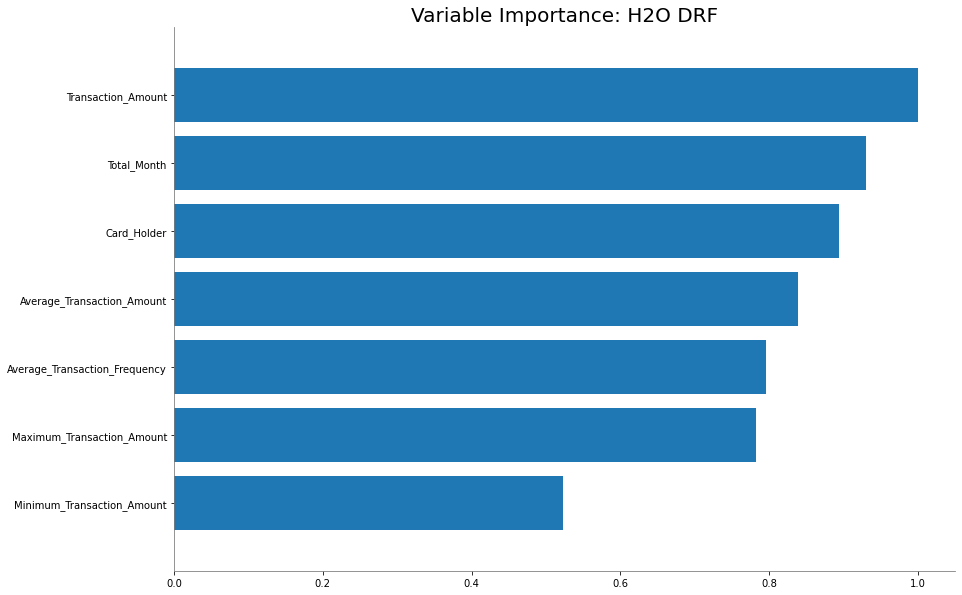

In [ ]:
model_f1_max(rf)
f1_max_threshold = rf.F1(valid=True)[0][0]
rf_performance = model_performance(model=rf, threshold=f1_max_threshold, header='RF')
model_performance(model=rf, threshold=f1_max_threshold, style=True)
rf.varimp_plot()

In [ ]:
varimp_base_model = variable_importances(rf, limit=0.99)
varimp_base_model

,variable,relative_importance,scaled_importance,percentage,cumulative
0,Transaction_Amount,3297.842773,1.000000,0.173452,0.173452
1,Total_Month,3068.561523,0.930475,0.161392,0.334844
2,Card_Holder,2950.009766,0.894527,0.155157,0.490001
3,Average_Transaction_Amount,2767.790283,0.839273,0.145573,0.635574
4,Average_Transaction_Frequency,2623.432129,0.795499,0.137981,0.773555
5,Maximum_Transaction_Amount,2579.719727,0.782245,0.135682,0.909236


### Random Forest Run 30x

In [ ]:
from h2o.estimators.random_forest import H2ORandomForestEstimator
model=[]
for i in range (30):
    rf = H2ORandomForestEstimator(ntrees=50, nfolds=10)
    rf.train(x=vars1, y=response, training_frame=trains[i], validation_frame=tests[i])
    model.append(rf)

In [ ]:
f1_total=[]
threshold_total=[]
precision_total=[]
sensitivity_total=[]
accuracy_total=[]
var=[]

for i in range (30):
    f1=model[i].F1(valid=True)[0][1]
    threshold = model[i].F1(valid=True)[0][0]
    precision=model[i].precision(train=False,valid=True,xval=False,thresholds=threshold)[0][1]
    sensitivity=model[i].sensitivity(train=False,valid=True,xval=False,thresholds=threshold)[0][1]
    accuracy=model[i].accuracy(train=False,valid=True,xval=False,thresholds=threshold)[0][1]
    
    f1_total.append(f1)
    threshold_total.append(threshold)
    precision_total.append(precision)
    sensitivity_total.append(sensitivity)
    accuracy_total.append(accuracy)
    
    vars = variable_importances(model[i],limit=1)
    var.append(vars)

In [ ]:
random_forest=pd.DataFrame({'threshold':threshold_total,'sensitivity':sensitivity_total,'precision':precision_total
                            ,'accuracy':accuracy_total,'F1':f1_total})
rf_mean=random_forest.copy()
rf_mean['threshold_mean']=rf_mean['threshold'].mean()
rf_mean['threshold_std']=rf_mean['threshold'].std()
rf_mean['sensitivity_mean']=rf_mean['sensitivity'].mean()
rf_mean['sensitivity_std']=rf_mean['sensitivity'].std()
rf_mean['precision_mean']=rf_mean['precision'].mean()
rf_mean['precision_std']=rf_mean['precision'].std()
rf_mean['accuracy_mean']=rf_mean['accuracy'].mean()
rf_mean['accuracy_std']=rf_mean['accuracy'].std()
rf_mean['F1_mean']=rf_mean['F1'].mean()
rf_mean['F1_std']=rf_mean['F1'].std()
rf_mean.drop(columns=random_forest.columns,axis=1,inplace=True)

In [ ]:
rf_mean=rf_mean.head(1)
rf_mean

In [ ]:
varimp = var[0]
for i in range (1,30):
    varimp=varimp.append(var[i])

In [ ]:
varimp = varimp.groupby(['variable'])[['percentage']].mean().sort_values(by='percentage', ascending= False)
varimp

## The Best Model

In [ ]:
performances = [base_model_performance, gbm_model_performance, rf_performance]
model_performances = pd.concat(performances, axis=1)
model_performances

,GLM,GLM,RF
Threshold,0.360253,0.293047,0.320000
F1,0.478632,0.597765,0.589041
Precision,0.636364,0.607955,0.589041
Sensitivity,0.383562,0.587912,0.589041
Accuracy,0.918667,0.923200,0.920000


### Predict Simulation

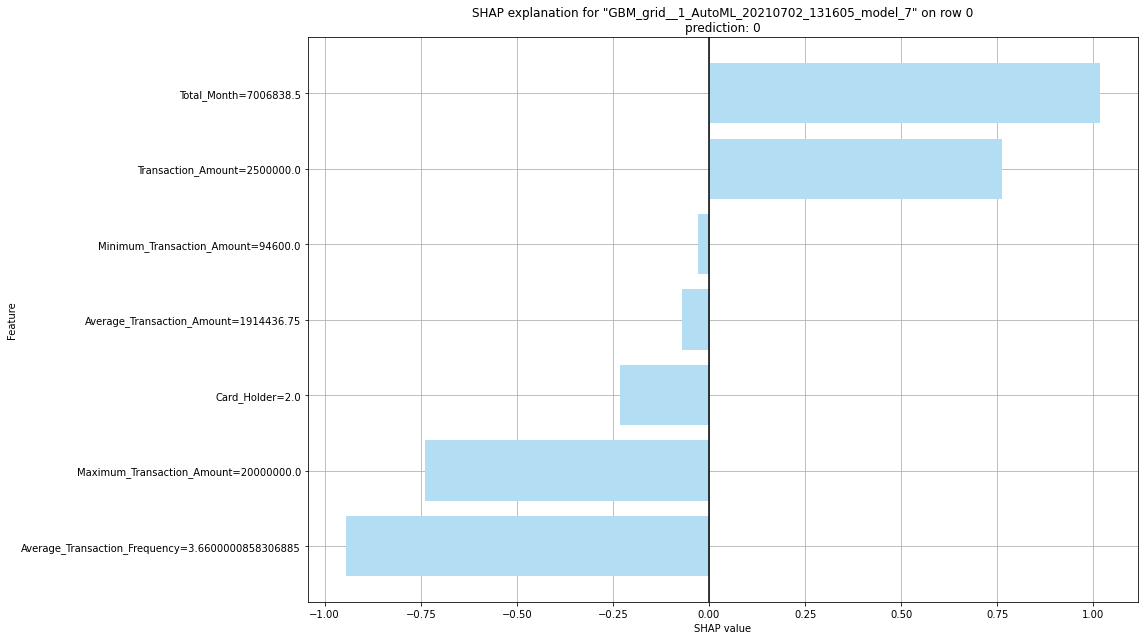

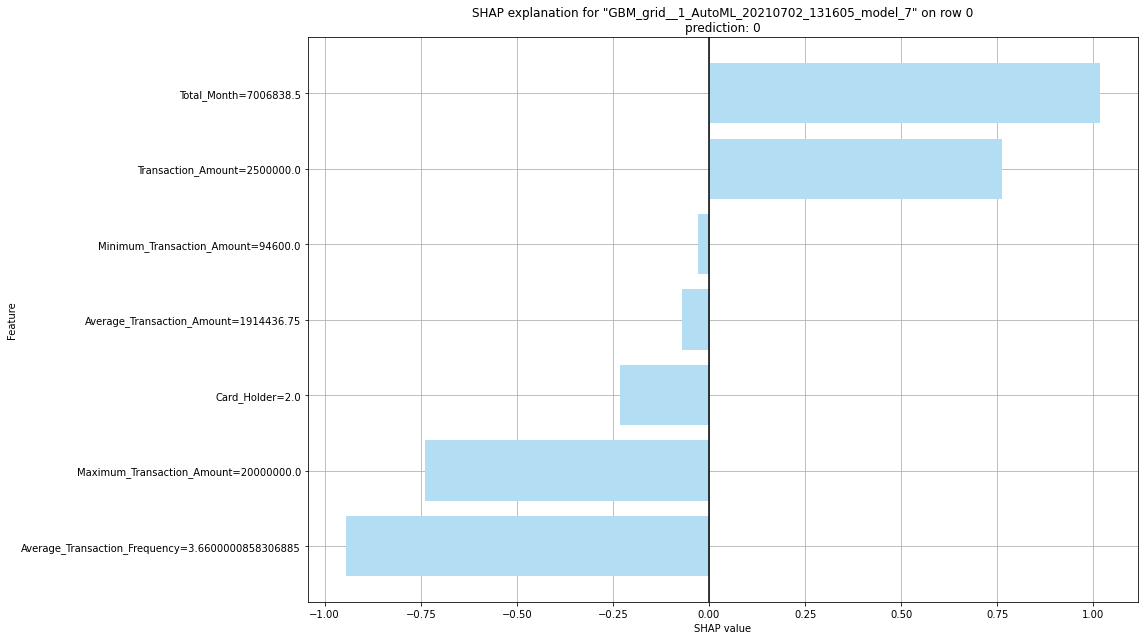

In [ ]:
gbm.shap_explain_row_plot(test, row_index=0)

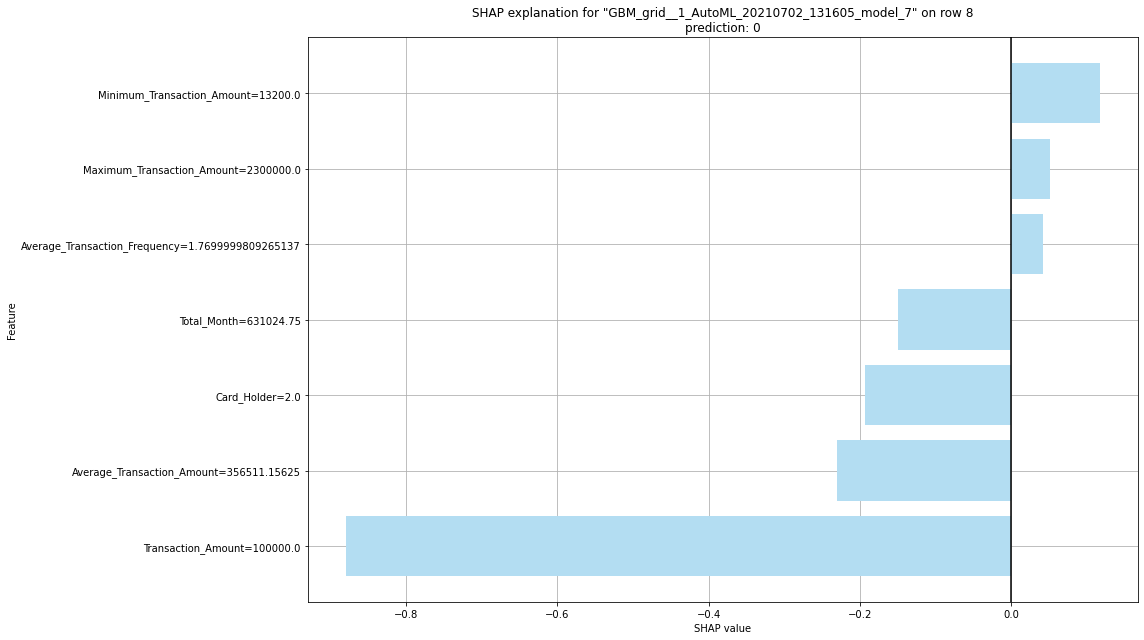

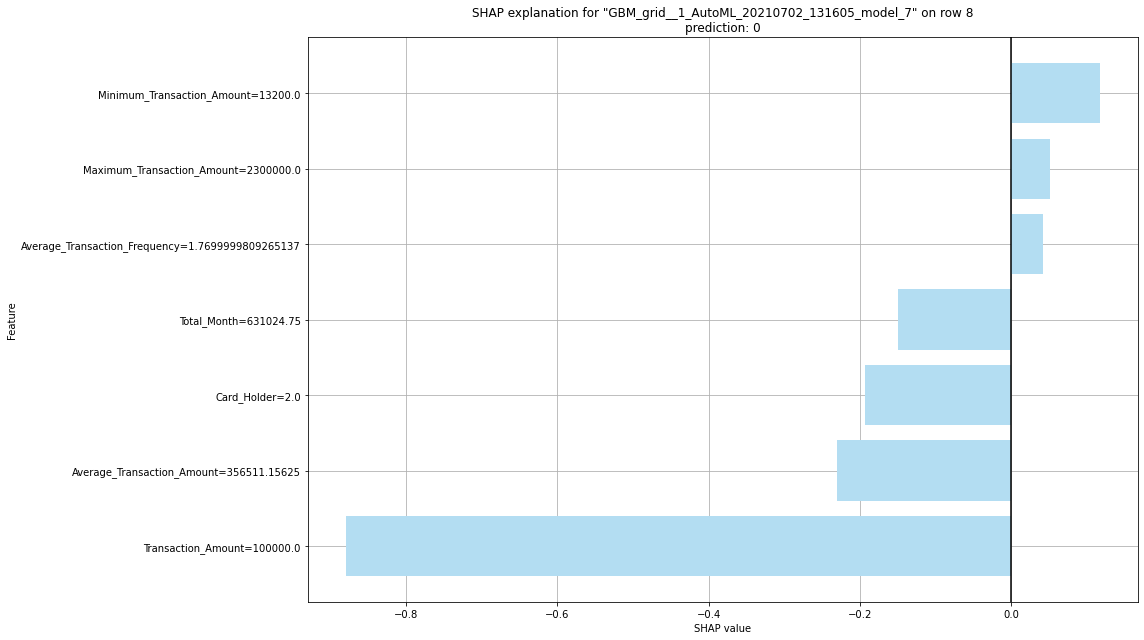

In [ ]:
gbm.shap_explain_row_plot(test, row_index=8)

### Fit GBM to data test

In [ ]:
data_test=pd.read_excel('C:/Users/Hp/Desktop/Kuliah/Semester 6/ADS/cctx_test.xlsx')

In [ ]:
data_test['Total_Month']=data_test['Average_Transaction_Amount']*data_test['Average_Transaction_Frequency']

In [ ]:
variables=['Transaction_ID','Transaction_Amount','Card_Holder','Maximum_Transaction_Amount','Minimum_Transaction_Amount',
'Total_Month','Average_Transaction_Amount','Average_Transaction_Frequency']

In [ ]:
data_test=data_test[variables]

In [ ]:
original = h2o.H2OFrame(data_test)
predict = gbm.predict(original[glm_vars])

Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%


In [ ]:
predict

predict,p0,p1
0,0.975901,0.024099
0,0.82866,0.17134
0,0.984256,0.0157439
1,0.167327,0.832673
0,0.908526,0.0914736
0,0.99474,0.0052603
0,0.949666,0.0503336
0,0.983048,0.0169521
0,0.942834,0.0571664
1,0.610356,0.389644


In [ ]:
gbm_predict = h2o.as_list(predict, use_pandas=True)
gbm_predict

,predict,p0,p1
0,0,0.975901,0.024099
1,0,0.828660,0.171340
2,0,0.984256,0.015744
3,1,0.167327,0.832673
4,0,0.908526,0.091474
...,...,...,...
2620,0,0.981828,0.018172
2621,0,0.984690,0.015310
2622,0,0.986584,0.013416
2623,0,0.760417,0.239583


In [ ]:
data_test['Fraud_Status_Predicted']=gbm_predict['predict']
prediction=data_test[['Transaction_ID','Fraud_Status_Predicted']]

In [ ]:
prediction

,Transaction_ID,Fraud_Status_Predicted
0,TX00001,0
1,TX00003,0
2,TX00011,0
3,TX00012,1
4,TX00013,0
...,...,...
2620,TX13111,0
2621,TX13112,0
2622,TX13115,0
2623,TX13119,0


In [ ]:
save_as = 'FinalProject_NozomuConsulting'

prediction.to_csv(save_as, index=False)

In [ ]:
data3=pd.read_excel('C:/Users/Hp/Desktop/Kuliah/Semester 6/ADS/cctx_train.xlsx')

In [ ]:
data3['Total_Month']=data3['Average_Transaction_Amount']*data3['Average_Transaction_Frequency']

In [ ]:
original = h2o.H2OFrame(data3)
predict2 = gbm.predict(original[glm_vars])

gbm_predict = h2o.as_list(predict2, use_pandas=True)
gbm_predict

Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%


,predict,p0,p1
0,0,0.993368,0.006632
1,0,0.973277,0.026723
2,0,0.984755,0.015245
3,0,0.755602,0.244398
4,0,0.947115,0.052885
...,...,...,...
10495,0,0.923173,0.076827
10496,1,0.676136,0.323864
10497,0,0.968053,0.031947
10498,0,0.945293,0.054707


In [ ]:
data3['Fraud_Status_Predicted']=gbm_predict['predict']
data3.head()

,Transaction_ID,Transaction_Flag,Transaction_Date,Transaction_Type,Transaction_Amount,Bank_ID,CC_ID,Card_Type,Card_Holder,Channel_ID,...,EDC_Type,EDC_Location,EDC_Owner,Average_Transaction_Amount,Maximum_Transaction_Amount,Minimum_Transaction_Amount,Average_Transaction_Frequency,Fraud_Status,Total_Month,Fraud_Status_Predicted
0,TX00002,False,2018-01-01 01:48:50.951,T08,50000.0,1,CCID5563,CC11,2,1,...,EDC0885,LEDC3703,OEDC0377,661855.03,11000000.0,24212.0,2.91,0,1.925998e+06,0
1,TX00004,False,2018-01-01 09:08:52.666,T01,1000000.0,1,CCID4598,CC08,2,1,...,EDC0565,LEDC3205,OEDC0377,2171907.10,28555000.0,100000.0,3.12,1,6.776350e+06,0
2,TX00005,False,2018-01-01 09:08:52.666,T15,1000000.0,1,CCID2839,CC08,2,1,...,EDC4639,LEDC3081,OEDC0377,1714437.98,8500000.0,50.0,3.58,0,6.137688e+06,0
3,TX00006,False,2018-01-01 09:45:55.969,T15,1000000.0,1,CCID2968,CC08,2,1,...,EDC3918,LEDC1993,OEDC0377,10163708.23,100000000.0,63000.0,2.57,0,2.612073e+07,0
4,TX00007,False,2018-01-01 23:41:59.228,T10,2500000.0,1,CCID0176,CC12,2,1,...,EDC2863,LEDC2062,OEDC0377,690066.65,3523000.0,26500.0,4.23,0,2.918982e+06,0


In [ ]:
data3.groupby(['Fraud_Status_Predicted'])['Transaction_Amount'].sum()

Fraud_Status_Predicted
0    1.129753e+10
1    2.566761e+09
Name: Transaction_Amount, dtype: float64

In [ ]:
data3.groupby(['Fraud_Status'])['Transaction_Amount'].sum()

Fraud_Status
0    1.230508e+10
1    1.559213e+09
Name: Transaction_Amount, dtype: float64

In [ ]:
data3.loc[(data3['Fraud_Status']==1)&(data3['Fraud_Status_Predicted']==1)]['Transaction_Amount'].sum()

888646240.0

In [ ]:
data3.loc[data3['Fraud_Status_Predicted']==1,'Transaction_Flag']='True'
data3.loc[data3['Fraud_Status_Predicted']==0,'Transaction_Flag']='False'

In [ ]:
value_counts(data3,'Transaction_Flag')

Value,Count,Percentage
False,"9,573",91.17%
True,927,8.83%


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(data3['Fraud_Status'],data3['Fraud_Status_Predicted'])
cm_df=pd.DataFrame(cm,columns=['Non-Fraud','Fraud'],index=['Non-Fraud', 'Fraud'])
cm_df

,Non-Fraud,Fraud
Non-Fraud,9207,565
Fraud,366,362
